 
# HAIL

In this notebook, we used [Hail](https://github.com/hail-is/hail) to calculate Polygenic Risk Scores (PRS). Hail does not calculate new betas but instead uses the existing weights from the GWAS and applies a custom formula for the calculation.


## Possible issues
 
1. Computation Time: Kindly note that HAIL is computationally expensive because it requires data in a specific format (.mt / matrix format), and then it loads the data for the computation.





We followed this tutorial to calculate the PRS:  
[https://nbviewer.org/github/ddbj/imputation-server-wf/blob/main/Notebooks/hail-prs-tutorial.ipynb](https://nbviewer.org/github/ddbj/imputation-server-wf/blob/main/Notebooks/hail-prs-tutorial.ipynb)

## Basic Process

1. Read the genotype data.
2. Convert it to VCF.
3. Use Beagle to convert the data to Beagle format.
4. Convert the Beagle format to Hail format.
5. Pass the data to Hail, GWAS, and genotype.
6. Calculate PRS using Hail.
     
### Genotype Data Processing

1. **Convert genotype data to VCF format.**  
   Hail requires data in `beagle.vcf.gz` format. The first step is to convert the `bed`, `bim`, and `fam` files to VCF format. A simple approach is to extract genotype data for each chromosome and then convert the data to VCF.

    ```bash
    plink --bfile traindirec/newtrainfilename.clumped.pruned --chr 22 --make-bed --out traindirec/newtrainfilename.clumped.pruned.22
    plink --bfile traindirec/newtrainfilename.clumped.pruned.22 --chr 22 --recode vcf --out traindirec/hail.train.22
    ```

2. **Download the phased reference panel.**  
   To run the following commands, download the phased reference panel from 1000 Genomes and place it in the current working directory:  
   [1000 Genomes Reference Panel](https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/)

    ```bash
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr1.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr2.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr3.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr4.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr5.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr6.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr7.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr8.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr9.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr10.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr11.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr12.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr13.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr14.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr15.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr16.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr17.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr18.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr19.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr20.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr21.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    wget https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr22.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz
    ```

3. **Alternatively, download the reference panel from Hail.**  
   - Reference panels:  
     [Hail Reference Panel](https://sc.ddbj.nig.ac.jp/en/advanced_guides/imputation_server_tutorial)

   - Files (2.6 GB):  
     - [test-data.GRCh37.vcf.gz](https://zenodo.org/records/6650681/files/test-data.GRCh37.vcf.gz?download=1) (1.3 GB, `md5:aff8bca4689cc70f6dbc1c3296590458`)  
     - [test-data.GRCh38.vcf.gz](https://zenodo.org/records/6650681/files/test-data.GRCh38.vcf.gz?download=1) (1.3 GB, `md5:d28a741e820444ca926f7b0d5ac2e196`)

4. **Download genetic distances from the Beagle website.**  
   [Beagle Genetic Maps](https://bochet.gcc.biostat.washington.edu/beagle/genetic_maps/)

5. **Download Beagle.**  
   - Beagle documentation:  
     [Beagle Documentation](https://faculty.washington.edu/browning/beagle/beagle_5.4_18Mar22.pdf)
   - Beagle download page:  
     [Download Beagle](https://faculty.washington.edu/browning/beagle/beagle.html)

6. **Run the Beagle command.**  
   Run the following command to perform phasing and imputation:

    ```bash
    java -Xmx50g -jar beagle gt=traindirec/hail.train.22.vcf ref=ALL.chr22.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr22.GRCh37.map out=traindirec/beagle.hail.train.22
    ```

7. **Follow the remaining process.**  
   The rest of the process is straightforward and can be followed from this GitHub repository:  
   [PRS on Hail GitHub Repository](https://github.com/hacchy1983/prs-on-hail-public)
 
 

## GWAS file processing for HAIL for Binary Phenotypes.
When the effect size relates to disease risk and is thus given as an odds ratio (OR) rather than BETA (for continuous traits), the PRS is computed as a product of ORs. To simplify this calculation, take the natural logarithm of the OR so that the PRS can be computed using summation instead.

In [2]:
import os
import pandas as pd
import numpy as np
import sys

#filedirec = sys.argv[1]

filedirec = "SampleData1"
#filedirec = "asthma_19"
#filedirec = "migraine_0"

def check_phenotype_is_binary_or_continous(filedirec):
    # Read the processed quality controlled file for a phenotype
    df = pd.read_csv(filedirec+os.sep+filedirec+'_QC.fam',sep="\s+",header=None)
    column_values = df[5].unique()
 
    if len(set(column_values)) == 2:
        return "Binary"
    else:
        return "Continous"



# Read the GWAS file.
GWAS = filedirec + os.sep + filedirec+".gz"
df = pd.read_csv(GWAS,compression= "gzip",sep="\s+")

 
if "BETA" in df.columns.to_list():
    # For Continous Phenotype.
    df = df[['CHR', 'BP', 'SNP', 'A1', 'A2', 'N', 'SE', 'P', 'BETA', 'INFO', 'MAF']]

else:
    df["BETA"] = np.log(df["OR"])
    df = df[['CHR', 'BP', 'SNP', 'A1', 'A2', 'N', 'SE', 'P', 'BETA', 'INFO', 'MAF']]


    
df = df.rename(columns={
    'CHR': 'chr_name',
    'BP': 'chr_position',
    'A1': 'effect_allele',
    'A2': 'other_allele',
    'BETA': 'effect_weight'
})

# Selecting the relevant columns
df = df[['chr_name', 'chr_position', 'effect_allele', 'other_allele', 'effect_weight']]
# Remove duplicates based on 'chr_name' and 'chr_position'
print("Length of DataFrame!",len(df))
df = df.drop_duplicates(subset=['chr_name', 'chr_position', 'effect_allele', 'other_allele'])
print("Length of DataFrame!",len(df))

df.to_csv(filedirec + os.sep +"Hail.txt",sep="\t",index=False)
print(df.head().to_markdown())
print("Length of DataFrame!",len(df))


Length of DataFrame! 499617
Length of DataFrame! 499617
|    |   chr_name |   chr_position | effect_allele   | other_allele   |   effect_weight |
|---:|-----------:|---------------:|:----------------|:---------------|----------------:|
|  0 |          1 |         756604 | A               | G              |     -0.00211532 |
|  1 |          1 |         768448 | A               | G              |      0.00068708 |
|  2 |          1 |         779322 | G               | A              |     -0.00239932 |
|  3 |          1 |         801536 | G               | T              |      0.00203363 |
|  4 |          1 |         808631 | G               | A              |      0.00130747 |
Length of DataFrame! 499617


### Define Hyperparameters

Define hyperparameters to be optimized and set initial values.

### Extract Valid SNPs from Clumped File

For Windows, download `gwak`, and for Linux, the `awk` command is sufficient. For Windows, `GWAK` is required. You can download it from [here](https://sourceforge.net/projects/gnuwin32/). Get it and place it in the same directory.


### Execution Path

At this stage, we have the genotype training data `newtrainfilename = "train_data.QC"` and genotype test data `newtestfilename = "test_data.QC"`.

We modified the following variables:

1. `filedirec = "SampleData1"` or `filedirec = sys.argv[1]`
2. `foldnumber = "0"` or `foldnumber = sys.argv[2]` for HPC.

Only these two variables can be modified to execute the code for specific data and specific folds. Though the code can be executed separately for each fold on HPC and separately for each dataset, it is recommended to execute it for multiple diseases and one fold at a time.
Here’s the corrected text in Markdown format:

 
### P-values

PRS calculation relies on P-values. SNPs with low P-values, indicating a high degree of association with a specific trait, are considered for calculation.

You can modify the code below to consider a specific set of P-values and save the file in the same format.

We considered the following parameters:

- **Minimum P-value**: `1e-10`
- **Maximum P-value**: `1.0`
- **Minimum exponent**: `10`  (Minimum P-value in exponent)
- **Number of intervals**: `100`  (Number of intervals to be considered)

The code generates an array of logarithmically spaced P-values:

```python
import numpy as np
import os

minimumpvalue = 10  # Minimum exponent for P-values
numberofintervals = 100  # Number of intervals to be considered

allpvalues = np.logspace(-minimumpvalue, 0, numberofintervals, endpoint=True)  # Generating an array of logarithmically spaced P-values

print("Minimum P-value:", allpvalues[0])
print("Maximum P-value:", allpvalues[-1])

count = 1
with open(os.path.join(folddirec, 'range_list'), 'w') as file:
    for value in allpvalues:
        file.write(f'pv_{value} 0 {value}\n')  # Writing range information to the 'range_list' file
        count += 1

pvaluefile = os.path.join(folddirec, 'range_list')
```

In this code:
- `minimumpvalue` defines the minimum exponent for P-values.
- `numberofintervals` specifies how many intervals to consider.
- `allpvalues` generates an array of P-values spaced logarithmically.
- The script writes these P-values to a file named `range_list` in the specified directory.
 

In [3]:
from operator import index
import pandas as pd
import numpy as np
import os
import subprocess
import sys
import pandas as pd
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import roc_auc_score, confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar

def create_directory(directory):
    """Function to create a directory if it doesn't exist."""
    if not os.path.exists(directory):  # Checking if the directory doesn't exist
        os.makedirs(directory)  # Creating the directory if it doesn't exist
    return directory  # Returning the created or existing directory

 
#foldnumber = sys.argv[1]
foldnumber = "0"  # Setting 'foldnumber' to "0"

folddirec = filedirec + os.sep + "Fold_" + foldnumber  # Creating a directory path for the specific fold
trainfilename = "train_data"  # Setting the name of the training data file
newtrainfilename = "train_data.QC"  # Setting the name of the new training data file

testfilename = "test_data"  # Setting the name of the test data file
newtestfilename = "test_data.QC"  # Setting the name of the new test data file

# Number of PCA to be included as a covariate.
numberofpca = ["6"]  # Setting the number of PCA components to be included

# Clumping parameters.
clump_p1 = [1]  # List containing clump parameter 'p1'
clump_r2 = [0.1]  # List containing clump parameter 'r2'
clump_kb = [200]  # List containing clump parameter 'kb'

# Pruning parameters.
p_window_size = [200]  # List containing pruning parameter 'window_size'
p_slide_size = [50]  # List containing pruning parameter 'slide_size'
p_LD_threshold = [0.25]  # List containing pruning parameter 'LD_threshold'

# Kindly note that the number of p-values to be considered varies, and the actual p-value depends on the dataset as well.
# We will specify the range list here.

minimumpvalue = 10  # Minimum p-value in exponent
numberofintervals = 20  # Number of intervals to be considered
allpvalues = np.logspace(-minimumpvalue, 0, numberofintervals, endpoint=True)  # Generating an array of logarithmically spaced p-values



count = 1
with open(folddirec + os.sep + 'range_list', 'w') as file:
    for value in allpvalues:
        file.write(f'pv_{value} 0 {value}\n')  # Writing range information to the 'range_list' file
        count = count + 1

pvaluefile = folddirec + os.sep + 'range_list'

# Initializing an empty DataFrame with specified column names
prs_result = pd.DataFrame(columns=["clump_p1", "clump_r2", "clump_kb", "p_window_size", "p_slide_size", "p_LD_threshold",
                                   "pvalue", "numberofpca","numberofvariants","Train_pure_prs", "Train_null_model", "Train_best_model",
                                   "Test_pure_prs", "Test_null_model", "Test_best_model"])

### Define Helper Functions

1. **Perform Clumping and Pruning**
2. **Calculate PCA Using Plink**
3. **Fit Binary Phenotype and Save Results**
4. **Fit Continuous Phenotype and Save Results**


In [4]:
import os
import subprocess
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import explained_variance_score


def perform_clumping_and_pruning_on_individual_data(traindirec, newtrainfilename,numberofpca, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile):
    
    command = [
    "./plink",
    "--bfile", traindirec+os.sep+newtrainfilename,
    "--maf",str(0.2),
    "--geno",str(0.001),
    "--hwe",str(0.00001),
    "--indep-pairwise", p1_val, p2_val, p3_val,
    "--out", traindirec+os.sep+trainfilename
    ]
    subprocess.run(command)
    # First perform pruning and then clumping and the pruning.

    command = [
    "./plink",
    "--bfile", traindirec+os.sep+newtrainfilename,
    "--clump-p1", c1_val,
    "--extract", traindirec+os.sep+trainfilename+".prune.in",
    "--clump-r2", c2_val,
    "--clump-kb", c3_val,
    "--clump", filedirec+os.sep+filedirec+".txt",
    "--clump-snp-field", "SNP",
    "--clump-field", "P",
    "--out", traindirec+os.sep+trainfilename
    ]    
    subprocess.run(command)

    # Extract the valid SNPs from th clumped file.
    # For windows download gwak for linux awk commmand is sufficient.
    ### For windows require GWAK.
    ### https://sourceforge.net/projects/gnuwin32/
    ##3 Get it and place it in the same direc.
    #os.system("gawk "+"\""+"NR!=1{print $3}"+"\"  "+ traindirec+os.sep+trainfilename+".clumped >  "+traindirec+os.sep+trainfilename+".valid.snp")
    #print("gawk "+"\""+"NR!=1{print $3}"+"\"  "+ traindirec+os.sep+trainfilename+".clumped >  "+traindirec+os.sep+trainfilename+".valid.snp")

    #Linux:
    command = f"awk 'NR!=1{{print $3}}' {traindirec}{os.sep}{trainfilename}.clumped > {traindirec}{os.sep}{trainfilename}.valid.snp"
    os.system(command)
    
    
    command = [
    "./plink",
    "--make-bed",
    "--bfile", traindirec+os.sep+newtrainfilename,
    "--indep-pairwise", p1_val, p2_val, p3_val,
    "--extract", traindirec+os.sep+trainfilename+".valid.snp",
    "--out", traindirec+os.sep+newtrainfilename+".clumped.pruned"
    ]
    subprocess.run(command)
    
    command = [
    "./plink",
    "--make-bed",
    "--bfile", traindirec+os.sep+testfilename,
    "--indep-pairwise", p1_val, p2_val, p3_val,
    "--extract", traindirec+os.sep+trainfilename+".valid.snp",
    "--out", traindirec+os.sep+testfilename+".clumped.pruned"
    ]
    subprocess.run(command)    
    
    
 
def calculate_pca_for_traindata_testdata_for_clumped_pruned_snps(traindirec, newtrainfilename,p):
    
    # Calculate the PRS for the test data using the same set of SNPs and also calculate the PCA.


    # Also extract the PCA at this point.
    # PCA are calculated afer clumping and pruining.
    command = [
        "./plink",
        "--bfile", folddirec+os.sep+testfilename+".clumped.pruned",
        # Select the final variants after clumping and pruning.
        "--extract", traindirec+os.sep+trainfilename+".valid.snp",
        "--pca", p,
        "--out", folddirec+os.sep+testfilename
    ]
    subprocess.run(command)


    command = [
    "./plink",
        "--bfile", traindirec+os.sep+newtrainfilename+".clumped.pruned",
        # Select the final variants after clumping and pruning.        
        "--extract", traindirec+os.sep+trainfilename+".valid.snp",
        "--pca", p,
        "--out", traindirec+os.sep+trainfilename
    ]
    subprocess.run(command)

# This function fit the binary model on the PRS.
def fit_binary_phenotype_on_PRS(traindirec, newtrainfilename,p, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile):
    threshold_values = allpvalues

    # Merge the covariates, pca and phenotypes.
    tempphenotype_train = pd.read_table(traindirec+os.sep+newtrainfilename+".clumped.pruned"+".fam", sep="\s+",header=None)
    phenotype_train = pd.DataFrame()
    phenotype_train["Phenotype"] = tempphenotype_train[5].values
    pcs_train = pd.read_table(traindirec+os.sep+trainfilename+".eigenvec", sep="\s+",header=None, names=["FID", "IID"] + [f"PC{str(i)}" for i in range(1, int(p)+1)])
    covariate_train = pd.read_table(traindirec+os.sep+trainfilename+".cov",sep="\s+")
    covariate_train.fillna(0, inplace=True)
    covariate_train = covariate_train[covariate_train["FID"].isin(pcs_train["FID"].values) & covariate_train["IID"].isin(pcs_train["IID"].values)]
    covariate_train['FID'] = covariate_train['FID'].astype(str)
    pcs_train['FID'] = pcs_train['FID'].astype(str)
    covariate_train['IID'] = covariate_train['IID'].astype(str)
    pcs_train['IID'] = pcs_train['IID'].astype(str)
    covandpcs_train = pd.merge(covariate_train, pcs_train, on=["FID","IID"])
    covandpcs_train.fillna(0, inplace=True)


    ## Scale the covariates!
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import explained_variance_score
    scaler = MinMaxScaler()
    normalized_values_train = scaler.fit_transform(covandpcs_train.iloc[:, 2:])
    #covandpcs_train.iloc[:, 2:] = normalized_values_test 
    
    
    tempphenotype_test = pd.read_table(traindirec+os.sep+testfilename+".clumped.pruned"+".fam", sep="\s+",header=None)
    phenotype_test= pd.DataFrame()
    phenotype_test["Phenotype"] = tempphenotype_test[5].values
    pcs_test = pd.read_table(traindirec+os.sep+testfilename+".eigenvec", sep="\s+",header=None, names=["FID", "IID"] + [f"PC{str(i)}" for i in range(1, int(p)+1)])
    covariate_test = pd.read_table(traindirec+os.sep+testfilename+".cov",sep="\s+")
    covariate_test.fillna(0, inplace=True)
    covariate_test = covariate_test[covariate_test["FID"].isin(pcs_test["FID"].values) & covariate_test["IID"].isin(pcs_test["IID"].values)]
    covariate_test['FID'] = covariate_test['FID'].astype(str)
    pcs_test['FID'] = pcs_test['FID'].astype(str)
    covariate_test['IID'] = covariate_test['IID'].astype(str)
    pcs_test['IID'] = pcs_test['IID'].astype(str)
    covandpcs_test = pd.merge(covariate_test, pcs_test, on=["FID","IID"])
    covandpcs_test.fillna(0, inplace=True)
    normalized_values_test  = scaler.transform(covandpcs_test.iloc[:, 2:])
    #covandpcs_test.iloc[:, 2:] = normalized_values_test     
    
    
    
    
    tempalphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    l1weights = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

    tempalphas = [0.1]
    l1weights = [0.1]

    phenotype_train["Phenotype"] = phenotype_train["Phenotype"].replace({1: 0, 2: 1}) 
    phenotype_test["Phenotype"] = phenotype_test["Phenotype"].replace({1: 0, 2: 1})
      
    for tempalpha in tempalphas:
        for l1weight in l1weights:

            
            try:
                null_model =  sm.Logit(phenotype_train["Phenotype"], sm.add_constant(covandpcs_train.iloc[:, 2:])).fit_regularized(alpha=tempalpha, L1_wt=l1weight)
                #null_model =  sm.Logit(phenotype_train["Phenotype"], sm.add_constant(covandpcs_train.iloc[:, 2:])).fit()
            
            except:
                print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
                continue

            train_null_predicted = null_model.predict(sm.add_constant(covandpcs_train.iloc[:, 2:]))
            
            from sklearn.metrics import roc_auc_score, confusion_matrix
            from sklearn.metrics import r2_score
            
            test_null_predicted = null_model.predict(sm.add_constant(covandpcs_test.iloc[:, 2:]))
            
           
            
            global prs_result 

            prs_train = pd.read_table(traindirec+os.sep+Name+os.sep+"train_hail_prs.csv",sep=",",index_col=0)
            print(prs_train)
            prs_train[['FID', 'IID']] = prs_train['subjectID'].str.split('_', expand=True)

            # Drop the original 'Combined' column if it's no longer needed
            prs_train = prs_train.drop(columns=['subjectID'])
            prs_train.rename(columns={'PGS002724': 'SCORE'}, inplace=True)
   
            
            

            prs_train['FID'] = prs_train['FID'].astype(str)
            prs_train['IID'] = prs_train['IID'].astype(str)
         
             
            prs_test = pd.read_table(traindirec+os.sep+Name+os.sep+"test_hail_prs.csv",sep=",",index_col=0)
            print(prs_test)
            prs_test[['FID', 'IID']] = prs_test['subjectID'].str.split('_', expand=True)

            # Drop the original 'Combined' column if it's no longer needed
            prs_test = prs_test.drop(columns=['subjectID'])
            prs_test.rename(columns={'PGS002724': 'SCORE'}, inplace=True)
   
        
            prs_test['FID'] = prs_test['FID'].astype(str)
            prs_test['IID'] = prs_test['IID'].astype(str)
            
            
            
            pheno_prs_train = pd.merge(covandpcs_train, prs_train, on=["FID", "IID"])
            pheno_prs_test = pd.merge(covandpcs_test, prs_test, on=["FID", "IID"])

            try:
                model = sm.Logit(phenotype_train["Phenotype"], sm.add_constant(pheno_prs_train.iloc[:, 2:])).fit_regularized(alpha=tempalpha, L1_wt=l1weight)
                #model = sm.Logit(phenotype_train["Phenotype"], sm.add_constant(pheno_prs_train.iloc[:, 2:])).fit()

            except:
                continue



            train_best_predicted = model.predict(sm.add_constant(pheno_prs_train.iloc[:, 2:]))    


            test_best_predicted = model.predict(sm.add_constant(pheno_prs_test.iloc[:, 2:])) 


            from sklearn.metrics import roc_auc_score, confusion_matrix

            prs_result = prs_result._append({
                "clump_p1": c1_val,
                "clump_r2": c2_val,
                "clump_kb": c3_val,
                "p_window_size": p1_val,
                "p_slide_size": p2_val,
                "p_LD_threshold": p3_val,
                #"pvalue": i,
                "numberofpca":p, 

                "tempalpha":str(tempalpha),
                "l1weight":str(l1weight),
              


                "Train_pure_prs":roc_auc_score(phenotype_train["Phenotype"].values,prs_train['SCORE'].values),
                "Train_null_model":roc_auc_score(phenotype_train["Phenotype"].values,train_null_predicted.values),
                "Train_best_model":roc_auc_score(phenotype_train["Phenotype"].values,train_best_predicted.values),

                "Test_pure_prs":roc_auc_score(phenotype_test["Phenotype"].values,prs_test['SCORE'].values),
                "Test_null_model":roc_auc_score(phenotype_test["Phenotype"].values,test_null_predicted.values),
                "Test_best_model":roc_auc_score(phenotype_test["Phenotype"].values,test_best_predicted.values),

            }, ignore_index=True)


            prs_result.to_csv(traindirec+os.sep+Name+os.sep+"Results.csv",index=False)
 

# This function fit the binary model on the PRS.
def fit_continous_phenotype_on_PRS(traindirec, newtrainfilename,p, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile):
    threshold_values = allpvalues

    # Merge the covariates, pca and phenotypes.
    tempphenotype_train = pd.read_table(traindirec+os.sep+newtrainfilename+".clumped.pruned"+".fam", sep="\s+",header=None)
    phenotype_train = pd.DataFrame()
    phenotype_train["Phenotype"] = tempphenotype_train[5].values
    pcs_train = pd.read_table(traindirec+os.sep+trainfilename+".eigenvec", sep="\s+",header=None, names=["FID", "IID"] + [f"PC{str(i)}" for i in range(1, int(p)+1)])
    covariate_train = pd.read_table(traindirec+os.sep+trainfilename+".cov",sep="\s+")
    covariate_train.fillna(0, inplace=True)
    covariate_train = covariate_train[covariate_train["FID"].isin(pcs_train["FID"].values) & covariate_train["IID"].isin(pcs_train["IID"].values)]
    covariate_train['FID'] = covariate_train['FID'].astype(str)
    pcs_train['FID'] = pcs_train['FID'].astype(str)
    covariate_train['IID'] = covariate_train['IID'].astype(str)
    pcs_train['IID'] = pcs_train['IID'].astype(str)
    covandpcs_train = pd.merge(covariate_train, pcs_train, on=["FID","IID"])
    covandpcs_train.fillna(0, inplace=True)


    ## Scale the covariates!
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import explained_variance_score
    scaler = MinMaxScaler()
    normalized_values_train = scaler.fit_transform(covandpcs_train.iloc[:, 2:])
    #covandpcs_train.iloc[:, 2:] = normalized_values_test 
    
    tempphenotype_test = pd.read_table(traindirec+os.sep+testfilename+".clumped.pruned"+".fam", sep="\s+",header=None)
    phenotype_test= pd.DataFrame()
    phenotype_test["Phenotype"] = tempphenotype_test[5].values
    pcs_test = pd.read_table(traindirec+os.sep+testfilename+".eigenvec", sep="\s+",header=None, names=["FID", "IID"] + [f"PC{str(i)}" for i in range(1, int(p)+1)])
    covariate_test = pd.read_table(traindirec+os.sep+testfilename+".cov",sep="\s+")
    covariate_test.fillna(0, inplace=True)
    covariate_test = covariate_test[covariate_test["FID"].isin(pcs_test["FID"].values) & covariate_test["IID"].isin(pcs_test["IID"].values)]
    covariate_test['FID'] = covariate_test['FID'].astype(str)
    pcs_test['FID'] = pcs_test['FID'].astype(str)
    covariate_test['IID'] = covariate_test['IID'].astype(str)
    pcs_test['IID'] = pcs_test['IID'].astype(str)
    covandpcs_test = pd.merge(covariate_test, pcs_test, on=["FID","IID"])
    covandpcs_test.fillna(0, inplace=True)
    normalized_values_test  = scaler.transform(covandpcs_test.iloc[:, 2:])
    #covandpcs_test.iloc[:, 2:] = normalized_values_test     
    
    
    
    
    tempalphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    l1weights = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

    tempalphas = [0.1]
    l1weights = [0.1]

    #phenotype_train["Phenotype"] = phenotype_train["Phenotype"].replace({1: 0, 2: 1}) 
    #phenotype_test["Phenotype"] = phenotype_test["Phenotype"].replace({1: 0, 2: 1})
      
    for tempalpha in tempalphas:
        for l1weight in l1weights:

            
            try:
                #null_model =  sm.OLS(phenotype_train["Phenotype"], sm.add_constant(covandpcs_train.iloc[:, 2:])).fit_regularized(alpha=tempalpha, L1_wt=l1weight)
                null_model =  sm.OLS(phenotype_train["Phenotype"], sm.add_constant(covandpcs_train.iloc[:, 2:])).fit()
                #null_model =  sm.OLS(phenotype_train["Phenotype"], sm.add_constant(covandpcs_train.iloc[:, 2:])).fit()
            except:
                print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
                continue

            train_null_predicted = null_model.predict(sm.add_constant(covandpcs_train.iloc[:, 2:]))
            
            from sklearn.metrics import roc_auc_score, confusion_matrix
            from sklearn.metrics import r2_score
            
            test_null_predicted = null_model.predict(sm.add_constant(covandpcs_test.iloc[:, 2:]))
            
            
            
            global prs_result 

            prs_train = pd.read_table(traindirec+os.sep+Name+os.sep+"train_hail_prs.csv",sep=",",index_col=0)
            print(prs_train)
            prs_train[['FID', 'IID']] = prs_train['subjectID'].str.split('_', expand=True)

            # Drop the original 'Combined' column if it's no longer needed
            prs_train = prs_train.drop(columns=['subjectID'])
            prs_train.rename(columns={'PGS002724': 'SCORE'}, inplace=True)

            

            prs_train['FID'] = prs_train['FID'].astype(str)
            prs_train['IID'] = prs_train['IID'].astype(str)
         
             
            prs_test = pd.read_table(traindirec+os.sep+Name+os.sep+"test_hail_prs.csv",sep=",",index_col=0)
            
            prs_test[['FID', 'IID']] = prs_test['subjectID'].str.split('_', expand=True)

            # Drop the original 'Combined' column if it's no longer needed
            prs_test = prs_test.drop(columns=['subjectID'])
            prs_test.rename(columns={'PGS002724': 'SCORE'}, inplace=True)
   
            print(prs_test)
        
            prs_test['FID'] = prs_test['FID'].astype(str)
            prs_test['IID'] = prs_test['IID'].astype(str)
            pheno_prs_train = pd.merge(covandpcs_train, prs_train, on=["FID", "IID"])
            pheno_prs_test = pd.merge(covandpcs_test, prs_test, on=["FID", "IID"])
            print(pheno_prs_train)
            
            

            try:
                #model = sm.OLS(phenotype_train["Phenotype"], sm.add_constant(pheno_prs_train.iloc[:, 2:])).fit_regularized(alpha=tempalpha, L1_wt=l1weight)
                model = sm.OLS(phenotype_train["Phenotype"], sm.add_constant(pheno_prs_train.iloc[:, 2:])).fit()

            except:
                print("Model did not fit")
                continue



            train_best_predicted = model.predict(sm.add_constant(pheno_prs_train.iloc[:, 2:]))    
            test_best_predicted = model.predict(sm.add_constant(pheno_prs_test.iloc[:, 2:])) 


            from sklearn.metrics import roc_auc_score, confusion_matrix

            prs_result = prs_result._append({
                "clump_p1": c1_val,
                "clump_r2": c2_val,
                "clump_kb": c3_val,
                "p_window_size": p1_val,
                "p_slide_size": p2_val,
                "p_LD_threshold": p3_val,
             
                "numberofpca":p, 

                "tempalpha":str(tempalpha),
                "l1weight":str(l1weight),
                

                "Train_pure_prs":explained_variance_score(phenotype_train["Phenotype"],prs_train['SCORE'].values),
                "Train_null_model":explained_variance_score(phenotype_train["Phenotype"],train_null_predicted),
                "Train_best_model":explained_variance_score(phenotype_train["Phenotype"],train_best_predicted),

                "Test_pure_prs":explained_variance_score(phenotype_test["Phenotype"],prs_test['SCORE'].values),
                "Test_null_model":explained_variance_score(phenotype_test["Phenotype"],test_null_predicted),
                "Test_best_model":explained_variance_score(phenotype_test["Phenotype"],test_best_predicted),

            }, ignore_index=True)

            print(prs_result)
            prs_result.to_csv(traindirec+os.sep+Name+os.sep+"Results.csv",index=False)

    return


## Execute HAIL

In [5]:
import hail as hl
import shutil 
import os
# Define a global variable to store results
prs_result = pd.DataFrame()
def transform_hail_data(traindirec, newtrainfilename,p, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile):
    ### First perform clumping on the file and save the clumpled file.
    perform_clumping_and_pruning_on_individual_data(traindirec, newtrainfilename,p, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile)
    
    #newtrainfilename = newtrainfilename+".clumped.pruned"
    #testfilename = testfilename+".clumped.pruned"
    
    
    #clupmedfile = traindirec+os.sep+newtrainfilename+".clump"
    #prunedfile = traindirec+os.sep+newtrainfilename+".clumped.pruned"

        
    # Also extract the PCA at this point for both test and training data.
    calculate_pca_for_traindata_testdata_for_clumped_pruned_snps(traindirec, newtrainfilename,p)

 
    # Delete the files generated in the previous iteration
 

    # Loop through each chromosome and delete the corresponding files
    import time
    
    def remove_path(path):
        try:
            if os.path.isdir(path):
                shutil.rmtree(path)  # Remove directory
                print(f'Deleted directory: {path}')
            else:
                os.remove(path)  # Remove file
                print(f'Deleted file: {path}')
        except OSError as e:
            print(f'Error deleting {path}: {e}')
            print('Retrying...')
          
        

    # Loop through each chromosome and delete the corresponding files and directories
    for chromosome in range(1, 23):
        train_path = os.path.join(traindirec, f'hail.train.{chromosome}.mt')
        test_path = os.path.join(traindirec, f'hail.test.{chromosome}.mt')

        # Delete train path if it exists
        if os.path.exists(train_path):
            remove_path(train_path)
            pass
        
        # Delete test path if it exists
        if os.path.exists(test_path):
            remove_path(test_path)
            pass
        
    

    #"""
    # Here we will perform processing on the genotype data and convert it to specific format
    # as required by HAIL.
    # Read the genotype data
    # Convert it to VCF
    # Use beagle to convert the data to  beagle format
    # Convert the beagle format to Hail format.
    
    
    
    
    for chromosome in range(1, 23):
        # Plink command to split by chromosome
        plink_command = [
            "./plink",
            "--bfile", traindirec+os.sep+newtrainfilename+".clumped.pruned",
            
            "--chr", str(chromosome),
            "--make-bed",
            "--out", traindirec+os.sep+newtrainfilename+".clumped.pruned."+str(chromosome),
        ]
        try:
            subprocess.run(plink_command, check=True)
        except:
            pass
        
        # Convert chromosomes to VCF format.
        plink_command = [
            "./plink",
            "--bfile", traindirec+os.sep+newtrainfilename+".clumped.pruned."+str(chromosome),
            "--chr", str(chromosome),
            "--recode","vcf",
            "--out", traindirec+os.sep+"hail.train."+str(chromosome),
        ]
        try:
            subprocess.run(plink_command)
        except:
            pass
        
        # Run beagle and convert the data to beagle format.
        #A “DR2” subfield with the estimated squared correlation between the estimated allele
        #dose and the true allele dose
        #• An “AF” subfield with the estimated alternate allele frequencies in the target samples
        #• The “IMP” flag if the marker is imputed
        
        beagle_command = [
            "java", 
            "-Xmx50g", 
            "-jar", "beagle", 
            #"gp=true",
            #"impute=false",
            #"burnin=1",
            #"window=100",
            "gt="+traindirec+os.sep+"hail.train."+str(chromosome)+".vcf",
            "ref="+"ALL.chr"+str(chromosome)+".phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz",
            "map="+"plink.chr"+str(chromosome)+".GRCh37.map",
            "out="+traindirec+os.sep+"beagle.hail.train."+str(chromosome)
        ]
        
        # Execute the command
        try:
            subprocess.run(beagle_command)
            print(" ".join(beagle_command))
        except:
            pass
        
        
        # Convert beagle format to HAIL format.
        try:
            hl.import_vcf(traindirec+os.sep+"beagle.hail.train."+str(chromosome)+".vcf.gz", force_bgz=True).write(traindirec+os.sep+"hail.train."+str(chromosome)+".mt", overwrite=True)
        except:
            pass
        
    # Read the genotype data       
 
    mt = ""
     
    filecount = 0
    for chromosome in range(1, 23):
        file = os.path.join(traindirec, f"hail.train.{chromosome}.mt")

        if os.path.exists(file):  # Check if the file exists
            if filecount == 0:
                mt = hl.read_matrix_table(file)
                print(mt.rows().show(5))
                print(chromosome, file, mt.count(), mt.count()) 
                filecount += 1  # Increment filecount after the first file is processed
            else:
                tmpmt = hl.read_matrix_table(file)
                mt = mt.union_rows(tmpmt)
                print(chromosome, file, tmpmt.count(), mt.count())
        else:
            print("File does not exist:", file)
            
 
    
    print(mt.count())

    mt.write(traindirec+os.sep+'HAILTRAIN.mt', overwrite=True)
    mt = hl.read_matrix_table(traindirec+os.sep+'HAILTRAIN.mt')
    print(mt.rows().show(5))
    
    mt = mt.annotate_rows(variantID = (hl.str(mt.locus.contig) + ":" + hl.str(mt.locus.position)) )    
    
    # We skipped the cleaning process as the data is already clean.
    #print(mt.rows().show(5))
    #mt1 = mt.filter_rows(hl.len(mt.info.DR2) == 1)  
    #mtnot1 = mt.filter_rows(hl.len(mt.info.DR2) > 1)
    #mt1_filt = mt1.filter_rows(mt1.info.DR2.first()>=0.3)
    #print(mt1_filt.rows().show(5))   
    
    model_PGS002724  = hl.import_table(filedirec+os.sep+"Hail.txt", impute=True, force=True, comment='#')
    model_PGS002724 = model_PGS002724.annotate(
    variantID = hl.str(model_PGS002724.chr_name) + ":" + hl.str(model_PGS002724.chr_position) 
    )
    model_PGS002724 = model_PGS002724.key_by('variantID')
    mt_match_PGS002724 = mt.annotate_rows(**model_PGS002724[mt.variantID])
    mt_match_PGS002724 = mt_match_PGS002724.filter_rows(hl.is_defined(mt_match_PGS002724.effect_weight))
    flip_PGS002724 = hl.case().when( 
        (mt_match_PGS002724.effect_allele == mt_match_PGS002724.alleles[0])
        & (mt_match_PGS002724.other_allele == mt_match_PGS002724.alleles[1]), True ).when( 
        (mt_match_PGS002724.effect_allele == mt_match_PGS002724.alleles[1])
        & (mt_match_PGS002724.other_allele == mt_match_PGS002724.alleles[0]), False ).or_missing()
    
    mt_match_PGS002724 = mt_match_PGS002724.annotate_rows(flip=flip_PGS002724)
    prs_PGS002724 = hl.agg.sum(hl.float64(mt_match_PGS002724.effect_weight) * 
                    hl.if_else( mt_match_PGS002724.flip, 
                                2 - mt_match_PGS002724.DS.first(),
                                mt_match_PGS002724.DS.first()))
     
    mt_match_PGS002724 = mt_match_PGS002724.annotate_cols(prs=prs_PGS002724)
    mt_match_PGS002724.cols().export(traindirec+os.sep+Name+os.sep+'train_PRS.txt')
    prs_PGS002724 = hl.import_table(traindirec+os.sep+Name+os.sep+'train_PRS.txt', impute=True, force=True)
   
    prs_PGS002724 = prs_PGS002724.key_by('s')
    prs_merge = prs_PGS002724.rename({'s':'subjectID', 'prs':'PGS002724'}) 
    prs_merge_pandas = prs_merge.to_pandas()
    print(prs_merge_pandas.head())
    prs_merge_pandas.to_csv(traindirec+os.sep+Name+os.sep+"train_hail_prs.csv")
     
    # Save the data.
    prs_merge_pandas = pd.read_csv(traindirec+os.sep+Name+os.sep+"train_hail_prs.csv",index_col=0)
    print(prs_merge_pandas.head())
    #"""
    
    #"""
    
    # Repeat the process for test dataset.
    # testfilename
    
    for chromosome in range(1, 23):
        # Plink command to split by chromosome
        plink_command = [
            "./plink",
            "--bfile", traindirec+os.sep+testfilename+".clumped.pruned",
 
            "--chr", str(chromosome),
            "--make-bed",
            "--out", traindirec+os.sep+testfilename+".clumped.pruned."+str(chromosome),
        ]
        try:
            subprocess.run(plink_command)
        except:
            pass
        
        plink_command = [
            "./plink",
            "--bfile",traindirec+os.sep+testfilename+".clumped.pruned."+str(chromosome),
            "--chr", str(chromosome),
            "--recode","vcf",
            "--out", traindirec+os.sep+"hail.test."+str(chromosome),
        ]
        try:
            subprocess.run(plink_command, check=True)
        except:
            pass
        
        beagle_command = [
            "java", 
            "-Xmx50g", 
            "-jar", "beagle", 
            #"gp=true",
            #"burnin=1",
            #"window=100",
            "gt="+traindirec+os.sep+"hail.test."+str(chromosome)+".vcf",
            "ref="+"ALL.chr"+str(chromosome)+".phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz",
            "map="+"plink.chr"+str(chromosome)+".GRCh37.map",
            "out="+traindirec+os.sep+"beagle.hail.test."+str(chromosome)
        ]

        # Execute the command
        try:
            subprocess.run(beagle_command)
            print(" ".join(beagle_command))
        except:
            pass
        
        #raise
        try:
            hl.import_vcf(traindirec+os.sep+"beagle.hail.test."+str(chromosome)+".vcf.gz", force_bgz=True).write(traindirec+os.sep+"hail.test."+str(chromosome)+".mt", overwrite=True)
            #raise
        except:
            pass
 
    mt = ""
     
    filecount = 0
    for chromosome in range(1, 23):
        file = os.path.join(traindirec, f"hail.test.{chromosome}.mt")

        if os.path.exists(file):  # Check if the file exists
            if filecount == 0:
                mt = hl.read_matrix_table(file)
                print(mt.rows().show(5))
                print(chromosome, file, mt.count(), mt.count()) 
                filecount += 1  # Increment filecount after the first file is processed
            else:
                tmpmt = hl.read_matrix_table(file)
                mt = mt.union_rows(tmpmt)
                print(chromosome, file, tmpmt.count(), mt.count())
        else:
            print("File does not exist:", file)    
    
    print(mt.count())
    mt.write(traindirec+os.sep+'HAILTEST.mt', overwrite=True)
    
    #"""
    #convert_data_in_hail_format()
    #"""
    mt = hl.read_matrix_table(traindirec+os.sep+'HAILTEST.mt')
    print(mt.rows().show(5))
    
    mt = mt.annotate_rows(variantID = (hl.str(mt.locus.contig) + ":" + hl.str(mt.locus.position)) )    
    #print(mt.rows().show(5))
    #mt1 = mt.filter_rows(hl.len(mt.info.DR2) == 1)  
    #mtnot1 = mt.filter_rows(hl.len(mt.info.DR2) > 1)
    #mt1_filt = mt1.filter_rows(mt1.info.DR2.first()>=0.3)
    #print(mt1_filt.rows().show(5))   
    
    model_PGS002724  = hl.import_table(filedirec+os.sep+"Hail.txt", impute=True, force=True, comment='#')
    model_PGS002724 = model_PGS002724.annotate(
    variantID = hl.str(model_PGS002724.chr_name) + ":" + hl.str(model_PGS002724.chr_position) 
    )
    model_PGS002724 = model_PGS002724.key_by('variantID')
    mt_match_PGS002724 = mt.annotate_rows(**model_PGS002724[mt.variantID])
    mt_match_PGS002724 = mt_match_PGS002724.filter_rows(hl.is_defined(mt_match_PGS002724.effect_weight))
    flip_PGS002724 = hl.case().when( 
        (mt_match_PGS002724.effect_allele == mt_match_PGS002724.alleles[0])
        & (mt_match_PGS002724.other_allele == mt_match_PGS002724.alleles[1]), True ).when( 
        (mt_match_PGS002724.effect_allele == mt_match_PGS002724.alleles[1])
        & (mt_match_PGS002724.other_allele == mt_match_PGS002724.alleles[0]), False ).or_missing()
    
    mt_match_PGS002724 = mt_match_PGS002724.annotate_rows(flip=flip_PGS002724)
    prs_PGS002724 = hl.agg.sum(hl.float64(mt_match_PGS002724.effect_weight) * 
                    hl.if_else( mt_match_PGS002724.flip, 
                                2 - mt_match_PGS002724.DS.first(),
                                mt_match_PGS002724.DS.first()))
     
    mt_match_PGS002724 = mt_match_PGS002724.annotate_cols(prs=prs_PGS002724)
    mt_match_PGS002724.cols().export(traindirec+os.sep+Name+os.sep+'test_PRS.txt')
    prs_PGS002724 = hl.import_table(traindirec+os.sep+Name+os.sep+'test_PRS.txt', impute=True, force=True)
   
    prs_PGS002724 = prs_PGS002724.key_by('s')
    prs_merge = prs_PGS002724.rename({'s':'subjectID', 'prs':'PGS002724'}) 
    prs_merge_pandas = prs_merge.to_pandas()
    print(prs_merge_pandas.head())
    prs_merge_pandas.to_csv(traindirec+os.sep+Name+os.sep+"test_hail_prs.csv")
    
    prs_merge_pandas = pd.read_csv(traindirec+os.sep+Name+os.sep+"test_hail_prs.csv",index_col=0)
    print(prs_merge_pandas.head())
    #"""
        
    
     
 

    # Load the PCA and Load the Covariates for trainingdatafirst.
    
    if check_phenotype_is_binary_or_continous(filedirec)=="Binary":
        print("Binary Phenotype!")
        fit_binary_phenotype_on_PRS(traindirec, newtrainfilename,p, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile)
    else:
        print("Continous Phenotype!")
        fit_continous_phenotype_on_PRS(traindirec, newtrainfilename,p, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile)
            

 
result_directory = "HAIL"
# Nested loops to iterate over different parameter values
create_directory(folddirec+os.sep+result_directory)
for p1_val in p_window_size:
 for p2_val in p_slide_size: 
  for p3_val in p_LD_threshold:
   for c1_val in clump_p1:
    for c2_val in clump_r2:
     for c3_val in clump_kb:
      for p in numberofpca:
        
        transform_hail_data(folddirec, newtrainfilename, p, str(p1_val), str(p2_val), str(p3_val), str(c1_val), str(c2_val), str(c3_val), result_directory, pvaluefile)


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC
  --geno 0.001
  --hwe 1e-05
  --indep-pairwise 200 50 0.25
  --maf 0.2
  --out SampleData1/Fold_0/train_data

63761 MB RAM detected; reserving 31880 MB for main workspace.
491952 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999894.
4954 variants removed due to missing genotype dat

439161 more top variant IDs missing; see log file.


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC
  --extract SampleData1/Fold_0/train_data.valid.snp
  --indep-pairwise 200 50 0.25
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned

63761 MB RAM detected; reserving 31880 MB for main workspace.
491952 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
--extract: 77998 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%3

Pruned 3 variants from chromosome 6, leaving 4414.
Pruned 4 variants from chromosome 7, leaving 4212.
Pruned 2 variants from chromosome 8, leaving 3866.
Pruned 1 variant from chromosome 9, leaving 3555.
Pruned 3 variants from chromosome 10, leaving 3949.
Pruned 1 variant from chromosome 11, leaving 3758.
Pruned 1 variant from chromosome 12, leaving 3715.
Pruned 2 variants from chromosome 13, leaving 2866.
Pruned 1 variant from chromosome 14, leaving 2590.
Pruned 2 variants from chromosome 15, leaving 2604.
Pruned 2 variants from chromosome 16, leaving 2870.
Pruned 0 variants from chromosome 17, leaving 2668.
Pruned 0 variants from chromosome 18, leaving 2603.
Pruned 0 variants from chromosome 19, leaving 2136.
Pruned 1 variant from chromosome 20, leaving 2239.
Pruned 0 variants from chromosome 21, leaving 1331.
Pruned 0 variants from chromosome 22, leaving 1321.
Pruning complete.  32 of 77998 variants removed.
Marker lists written to
SampleData1/Fold_0/train_data.QC.clumped.pruned.prun

Pruned 170 variants from chromosome 13, leaving 2698.
Pruned 124 variants from chromosome 14, leaving 2467.
Pruned 137 variants from chromosome 15, leaving 2469.
Pruned 170 variants from chromosome 16, leaving 2702.
Pruned 124 variants from chromosome 17, leaving 2544.
Pruned 134 variants from chromosome 18, leaving 2469.
Pruned 98 variants from chromosome 19, leaving 2038.
Pruned 147 variants from chromosome 20, leaving 2093.
Pruned 68 variants from chromosome 21, leaving 1263.
Pruned 57 variants from chromosome 22, leaving 1264.
Pruning complete.  4697 of 77998 variants removed.
Marker lists written to SampleData1/Fold_0/test_data.clumped.pruned.prune.in
and SampleData1/Fold_0/test_data.clumped.pruned.prune.out .
PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned

Relationship matrix calculation complete.
--pca: Results saved to SampleData1/Fold_0/test_data.eigenval and
SampleData1/Fold_0/test_data.eigenvec .
PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --extract SampleData1/Fold_0/train_data.valid.snp
  --out SampleData1/Fold_0/train_data
  --pca 6

63761 MB RAM detected; reserving 31880 MB for main workspace.
77998 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
--extract: 77998 variants remaining.
Using up to 8 threads (change this with --threads).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%

30720 markers complete.

56340 markers complete.

Relationship matrix calculation complete.


--pca: Results saved to SampleData1/Fold_0/train_data.eigenval and
SampleData1/Fold_0/train_data.eigenvec .
Deleted directory: SampleData1/Fold_0/hail.train.1.mt
Deleted directory: SampleData1/Fold_0/hail.train.2.mt
Deleted directory: SampleData1/Fold_0/hail.train.3.mt
Deleted directory: SampleData1/Fold_0/hail.train.4.mt
Deleted directory: SampleData1/Fold_0/hail.train.5.mt
Deleted directory: SampleData1/Fold_0/hail.train.6.mt
Deleted directory: SampleData1/Fold_0/hail.train.7.mt
Deleted directory: SampleData1/Fold_0/hail.train.8.mt
Deleted directory: SampleData1/Fold_0/hail.train.9.mt
Deleted directory: SampleData1/Fold_0/hail.train.10.mt
Deleted directory: SampleData1/Fold_0/hail.train.11.mt
Deleted directory: SampleData1/Fold_0/hail.train.12.mt
Deleted directory: SampleData1/Fold_0/hail.train.13.mt
Deleted directory: SampleData1/Fold_0/hail.train.14.mt
Deleted directory: SampleData1/Fold_0/hail.train.15.mt
Deleted directory: SampleData1/Fold_0/hail.train.16.mt
PLINK v1.90b7.2 64-bi

Phasing iteration 10:          1 second
Phasing iteration 11:          1 second
Phasing iteration 12:          1 second

Imputation time:               1 minute 15 seconds

Window 6 [1:173093312-213583529]
Reference markers:            1,151,258
Study     markers:                  766

Burnin  iteration 1:           2 seconds
Burnin  iteration 2:           2 seconds
Burnin  iteration 3:           2 seconds

Estimated ne:                  7897
Estimated err:                 7.5e-04

Phasing iteration 1:           1 second
Phasing iteration 2:           1 second
Phasing iteration 3:           1 second
Phasing iteration 4:           1 second
Phasing iteration 5:           1 second
Phasing iteration 6:           1 second
Phasing iteration 7:           1 second
Phasing iteration 8:           1 second
Phasing iteration 9:           1 second
Phasing iteration 10:          1 second
Phasing iteration 11:          1 second
Phasing iteration 12:          1 second

Imputation time:               2

Initializing Hail with default parameters...



Imputation time:               9 seconds

Cumulative Statistics:

Reference markers:            6,468,094
Study     markers:                4,870

Haplotype phasing time:        1 minute 34 seconds
Imputation time:               6 minutes 50 seconds
Total time:                    9 minutes 13 seconds

End time: 01:58 PM AEST on 27 Sep 2024
beagle.06Aug24.a91.jar finished
java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.train.1.vcf ref=ALL.chr1.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr1.GRCh37.map out=SampleData1/Fold_0/beagle.hail.train.1


SLF4J: Failed to load class "org.slf4j.impl.StaticLoggerBinder".
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See http://www.slf4j.org/codes.html#StaticLoggerBinder for further details.
Running on Apache Spark version 3.5.1
SparkUI available at http://login02:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.132-678e1f52b999
LOGGING: writing to /data/ascher01/uqmmune1/BenchmarkingPGSTools/hail-20240927-1358-0.2.132-678e1f52b999.log
2024-09-27 13:58:45.333 Hail: INFO: scanning VCF for sortedness...
SLF4J: Failed to load class "org.slf4j.impl.StaticMDCBinder".
SLF4J: Defaulting to no-operation MDCAdapter implementation.
SLF4J: See http://www.slf4j.org/codes.html#no_static_mdc_binder for further details.
2024-09-27 13:59:05.274 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 14:04:57.046 Hail: INFO: wrote matrix table with 6468094 rows a

PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.2.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 2
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.2

63761 MB RAM detected; reserving 31880 MB for main workspace.
8998 out of 114118 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999929.
8998 variants and 380 people pa


Window 7 [2:218829611-242575162]
Reference markers:              734,807
Study     markers:                1,103

Burnin  iteration 1:           2 seconds
Burnin  iteration 2:           1 second
Burnin  iteration 3:           1 second

Estimated ne:                  9018
Estimated err:                 8.8e-04

Phasing iteration 1:           1 second
Phasing iteration 2:           1 second
Phasing iteration 3:           1 second
Phasing iteration 4:           1 second
Phasing iteration 5:           1 second
Phasing iteration 6:           1 second
Phasing iteration 7:           1 second
Phasing iteration 8:           1 second
Phasing iteration 9:           1 second
Phasing iteration 10:          1 second
Phasing iteration 11:          1 second
Phasing iteration 12:          0 seconds

Imputation time:               16 seconds

Window 8 [2:241170836-243188367]
Reference markers:               65,148
Study     markers:                   65

Burnin  iteration 1:           0 seconds
Burnin 

2024-09-27 14:12:47.026 Hail: INFO: scanning VCF for sortedness...
2024-09-27 14:13:05.331 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 14:18:18.220 Hail: INFO: wrote matrix table with 7081600 rows and 380 columns in 2 partitions to SampleData1/Fold_0/hail.train.2.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.3.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 3
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.3

63761 MB RAM detected; reserving 31880 MB for main workspace.
7649 out of 114118 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999916.
7649 variants and 380 people pa


Imputation time:               13 seconds

Cumulative Statistics:

Reference markers:            5,832,276
Study     markers:                6,419

Haplotype phasing time:        2 minutes 1 second
Imputation time:               2 minutes 53 seconds
Total time:                    6 minutes 14 seconds

End time: 02:24 PM AEST on 27 Sep 2024
beagle.06Aug24.a91.jar finished
java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.train.3.vcf ref=ALL.chr3.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr3.GRCh37.map out=SampleData1/Fold_0/beagle.hail.train.3


2024-09-27 14:24:32.872 Hail: INFO: scanning VCF for sortedness...
2024-09-27 14:24:57.642 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 14:33:22.829 Hail: INFO: wrote matrix table with 5832276 rows and 380 columns in 1 partition to SampleData1/Fold_0/hail.train.3.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.4.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 4
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.4

63761 MB RAM detected; reserving 31880 MB for main workspace.
7312 out of 114118 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999935.
7312 variants and 380 people pa


Imputation time:               6 seconds

Cumulative Statistics:

Reference markers:            5,732,585
Study     markers:                6,121

Haplotype phasing time:        1 minute 13 seconds
Imputation time:               1 minute 41 seconds
Total time:                    4 minutes 6 seconds

End time: 02:37 PM AEST on 27 Sep 2024
beagle.06Aug24.a91.jar finished
java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.train.4.vcf ref=ALL.chr4.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr4.GRCh37.map out=SampleData1/Fold_0/beagle.hail.train.4


2024-09-27 14:37:29.240 Hail: INFO: scanning VCF for sortedness...
2024-09-27 14:37:52.712 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 14:45:55.265 Hail: INFO: wrote matrix table with 5732585 rows and 380 columns in 1 partition to SampleData1/Fold_0/hail.train.4.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.5.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 5
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.5

63761 MB RAM detected; reserving 31880 MB for main workspace.
10632 out of 172878 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999882.
10632 variants and 380 people 

2024-09-27 14:50:49.927 Hail: INFO: scanning VCF for sortedness...
2024-09-27 14:51:13.675 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 14:59:00.308 Hail: INFO: wrote matrix table with 5265763 rows and 380 columns in 1 partition to SampleData1/Fold_0/hail.train.5.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.6.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 6
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.6

63761 MB RAM detected; reserving 31880 MB for main workspace.
10068 out of 172878 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999902.
10068 variants and 380 people 

java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.train.6.vcf ref=ALL.chr6.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr6.GRCh37.map out=SampleData1/Fold_0/beagle.hail.train.6


2024-09-27 15:03:03.199 Hail: INFO: scanning VCF for sortedness...
2024-09-27 15:03:23.648 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 15:10:43.593 Hail: INFO: wrote matrix table with 5024119 rows and 380 columns in 1 partition to SampleData1/Fold_0/hail.train.6.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.7.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 7
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.7

63761 MB RAM detected; reserving 31880 MB for main workspace.
9496 out of 172878 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999897.
9496 variants and 380 people pa

2024-09-27 15:14:26.167 Hail: INFO: scanning VCF for sortedness...
2024-09-27 15:14:46.616 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 15:21:32.811 Hail: INFO: wrote matrix table with 4716715 rows and 380 columns in 1 partition to SampleData1/Fold_0/hail.train.7.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.8.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 8
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.8

63761 MB RAM detected; reserving 31880 MB for main workspace.
8867 out of 172878 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999891.
8867 variants and 380 people pa

java.lang.IllegalArgumentException: Duplicate marker: 8	89329148	.	G	A
	at vcf.Markers.markerSet(Markers.java:129)
	at vcf.Markers.<init>(Markers.java:83)
	at vcf.Markers.create(Markers.java:62)
	at vcf.RefGT.<init>(RefGT.java:90)
	at vcf.RefTargSlidingWindow$Reader.window(RefTargSlidingWindow.java:326)
	at vcf.RefTargSlidingWindow$Reader.readWindow(RefTargSlidingWindow.java:303)
	at vcf.RefTargSlidingWindow$Reader.run(RefTargSlidingWindow.java:246)
	at java.base/java.lang.Thread.run(Thread.java:829)

Terminating program.


java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.train.8.vcf ref=ALL.chr8.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr8.GRCh37.map out=SampleData1/Fold_0/beagle.hail.train.8


2024-09-27 15:24:02.637 Hail: INFO: scanning VCF for sortedness...
2024-09-27 15:24:11.134 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 15:27:05.495 Hail: INFO: wrote matrix table with 2039669 rows and 380 columns in 1 partition to SampleData1/Fold_0/hail.train.8.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.9.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 9
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.9

63761 MB RAM detected; reserving 31880 MB for main workspace.
7768 out of 172878 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999892.
7768 variants and 380 people pa

2024-09-27 15:30:37.280 Hail: INFO: scanning VCF for sortedness...
2024-09-27 15:30:52.044 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 15:35:56.524 Hail: INFO: wrote matrix table with 3560687 rows and 380 columns in 1 partition to SampleData1/Fold_0/hail.train.9.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.10.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 10
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.10

63761 MB RAM detected; reserving 31880 MB for main workspace.
8824 out of 172878 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999901.
8824 variants and 380 people

2024-09-27 15:38:26.409 Hail: INFO: scanning VCF for sortedness...
2024-09-27 15:38:42.411 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 15:44:28.695 Hail: INFO: wrote matrix table with 3992219 rows and 380 columns in 1 partition to SampleData1/Fold_0/hail.train.10.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.11.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 11
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.11

63761 MB RAM detected; reserving 31880 MB for main workspace.
8420 out of 172878 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.9999.
8420 variants and 380 people p

2024-09-27 15:47:52.751 Hail: INFO: scanning VCF for sortedness...
2024-09-27 15:48:09.331 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 15:53:57.158 Hail: INFO: wrote matrix table with 4045628 rows and 380 columns in 1 partition to SampleData1/Fold_0/hail.train.11.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.12.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 12
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.12

63761 MB RAM detected; reserving 31880 MB for main workspace.
8198 out of 172878 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999891.
8198 variants and 380 people

java.lang.IllegalArgumentException: Duplicate marker: 12	8400000	.	T	G
	at vcf.Markers.markerSet(Markers.java:129)
	at vcf.Markers.<init>(Markers.java:83)
	at vcf.Markers.create(Markers.java:62)
	at vcf.RefGT.<init>(RefGT.java:90)
	at vcf.RefTargSlidingWindow$Reader.window(RefTargSlidingWindow.java:326)
	at vcf.RefTargSlidingWindow$Reader.readWindow(RefTargSlidingWindow.java:303)
	at vcf.RefTargSlidingWindow$Reader.run(RefTargSlidingWindow.java:246)
	at java.base/java.lang.Thread.run(Thread.java:829)

Terminating program.


java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.train.12.vcf ref=ALL.chr12.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr12.GRCh37.map out=SampleData1/Fold_0/beagle.hail.train.12


2024-09-27 15:54:16.909 Hail: INFO: scanning VCF for sortedness...
2024-09-27 15:54:17.167 Hail: INFO: Coerced sorted VCF - no additional import work to do
2024-09-27 15:54:17.658 Hail: INFO: wrote matrix table with 0 rows and 380 columns in 0 partitions to SampleData1/Fold_0/hail.train.12.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.13.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 13
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.13

63761 MB RAM detected; reserving 31880 MB for main workspace.
6350 out of 172878 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999901.
6350 variants and 380 people

2024-09-27 15:56:40.644 Hail: INFO: scanning VCF for sortedness...
2024-09-27 15:56:53.103 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 16:01:03.478 Hail: INFO: wrote matrix table with 2857916 rows and 380 columns in 1 partition to SampleData1/Fold_0/hail.train.13.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.14.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 14
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.14

63761 MB RAM detected; reserving 31880 MB for main workspace.
5742 out of 172878 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999852.
5742 variants and 380 people

java.lang.IllegalArgumentException: Duplicate marker: 14	21649957	.	C	T
	at vcf.Markers.markerSet(Markers.java:129)
	at vcf.Markers.<init>(Markers.java:83)
	at vcf.Markers.create(Markers.java:62)
	at vcf.RefGT.<init>(RefGT.java:90)
	at vcf.RefTargSlidingWindow$Reader.window(RefTargSlidingWindow.java:326)
	at vcf.RefTargSlidingWindow$Reader.readWindow(RefTargSlidingWindow.java:303)
	at vcf.RefTargSlidingWindow$Reader.run(RefTargSlidingWindow.java:246)
	at java.base/java.lang.Thread.run(Thread.java:829)

Terminating program.


java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.train.14.vcf ref=ALL.chr14.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr14.GRCh37.map out=SampleData1/Fold_0/beagle.hail.train.14


2024-09-27 16:01:21.924 Hail: INFO: scanning VCF for sortedness...
2024-09-27 16:01:22.171 Hail: INFO: Coerced sorted VCF - no additional import work to do
2024-09-27 16:01:22.527 Hail: INFO: wrote matrix table with 0 rows and 380 columns in 0 partitions to SampleData1/Fold_0/hail.train.14.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.15.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 15
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.15

63761 MB RAM detected; reserving 31880 MB for main workspace.
5569 out of 172878 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999887.
5569 variants and 380 people

2024-09-27 16:05:29.868 Hail: INFO: scanning VCF for sortedness...
2024-09-27 16:05:40.131 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 16:09:07.754 Hail: INFO: wrote matrix table with 2424689 rows and 380 columns in 1 partition to SampleData1/Fold_0/hail.train.15.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.16.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 16
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.16

63761 MB RAM detected; reserving 31880 MB for main workspace.
6069 out of 172878 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.99988.
6069 variants and 380 people 

java.util.zip.ZipException: invalid distance too far back
	at java.base/java.util.zip.InflaterInputStream.read(InflaterInputStream.java:165)
	at java.base/java.util.zip.GZIPInputStream.read(GZIPInputStream.java:118)
	at java.base/java.io.FilterInputStream.read(FilterInputStream.java:107)
	at blbutil.BGZipIt.inflateBlock(BGZipIt.java:314)
	at blbutil.BGZipIt.lambda$readAndInflateBlocks$3(BGZipIt.java:263)
	at java.base/java.util.stream.ReferencePipeline$3$1.accept(ReferencePipeline.java:195)
	at java.base/java.util.ArrayList$ArrayListSpliterator.forEachRemaining(ArrayList.java:1655)
	at java.base/java.util.stream.AbstractPipeline.copyInto(AbstractPipeline.java:484)
	at java.base/java.util.stream.AbstractPipeline.wrapAndCopyInto(AbstractPipeline.java:474)
	at java.base/java.util.stream.Nodes$SizedCollectorTask.compute(Nodes.java:1886)
	at java.base/java.util.concurrent.CountedCompleter.exec(CountedCompleter.java:746)
	at java.base/java.util.concurrent.ForkJoinTask.doExec(ForkJoinTask.jav

java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.train.16.vcf ref=ALL.chr16.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr16.GRCh37.map out=SampleData1/Fold_0/beagle.hail.train.16


2024-09-27 16:10:30.430 Hail: INFO: scanning VCF for sortedness...
2024-09-27 16:10:33.858 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 16:11:36.417 Hail: INFO: wrote matrix table with 725178 rows and 380 columns in 1 partition to SampleData1/Fold_0/hail.train.16.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.17.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 17
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.17

63761 MB RAM detected; reserving 31880 MB for main workspace.
5723 out of 172878 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999884.
5723 variants and 380 people

java.lang.IllegalArgumentException: Duplicate marker: 17	1144632	.	C	CT
	at vcf.Markers.markerSet(Markers.java:129)
	at vcf.Markers.<init>(Markers.java:83)
	at vcf.Markers.create(Markers.java:62)
	at vcf.RefGT.<init>(RefGT.java:90)
	at vcf.RefTargSlidingWindow$Reader.window(RefTargSlidingWindow.java:326)
	at vcf.RefTargSlidingWindow$Reader.readWindow(RefTargSlidingWindow.java:303)
	at vcf.RefTargSlidingWindow$Reader.run(RefTargSlidingWindow.java:246)
	at java.base/java.lang.Thread.run(Thread.java:829)

Terminating program.
2024-09-27 16:11:51.161 Hail: INFO: scanning VCF for sortedness...


java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.train.17.vcf ref=ALL.chr17.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr17.GRCh37.map out=SampleData1/Fold_0/beagle.hail.train.17


2024-09-27 16:11:51.378 Hail: INFO: Coerced sorted VCF - no additional import work to do
2024-09-27 16:11:52.022 Hail: INFO: wrote matrix table with 0 rows and 380 columns in 0 partitions to SampleData1/Fold_0/hail.train.17.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.18.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 18
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.18

63761 MB RAM detected; reserving 31880 MB for main workspace.
5578 out of 172878 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999906.
5578 variants and 380 people

2024-09-27 16:13:57.798 Hail: INFO: scanning VCF for sortedness...
2024-09-27 16:14:07.440 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 16:17:28.490 Hail: INFO: wrote matrix table with 2267185 rows and 380 columns in 1 partition to SampleData1/Fold_0/hail.train.18.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.19.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 19
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.19

63761 MB RAM detected; reserving 31880 MB for main workspace.
4364 out of 172878 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.99987.
4364 variants and 380 people 

2024-09-27 16:19:13.692 Hail: INFO: scanning VCF for sortedness...
2024-09-27 16:19:22.149 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 16:21:59.026 Hail: INFO: wrote matrix table with 1832506 rows and 380 columns in 1 partition to SampleData1/Fold_0/hail.train.19.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.20.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 20
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.20

63761 MB RAM detected; reserving 31880 MB for main workspace.
4916 out of 172878 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999887.
4916 variants and 380 people

2024-09-27 16:23:41.589 Hail: INFO: scanning VCF for sortedness...
2024-09-27 16:23:49.312 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 16:26:24.612 Hail: INFO: wrote matrix table with 1812841 rows and 380 columns in 1 partition to SampleData1/Fold_0/hail.train.20.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.21.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 21
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.21

63761 MB RAM detected; reserving 31880 MB for main workspace.
2811 out of 172878 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999906.
2811 variants and 380 people

2024-09-27 16:27:40.991 Hail: INFO: scanning VCF for sortedness...
2024-09-27 16:27:45.921 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 16:29:24.159 Hail: INFO: wrote matrix table with 1105538 rows and 380 columns in 1 partition to SampleData1/Fold_0/hail.train.21.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.22.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC.clumped.pruned
  --chr 22
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned.22

63761 MB RAM detected; reserving 31880 MB for main workspace.
2831 out of 172878 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999896.
2831 variants and 380 people

java.util.zip.ZipException: invalid distance too far back
	at java.base/java.util.zip.InflaterInputStream.read(InflaterInputStream.java:165)
	at java.base/java.util.zip.GZIPInputStream.read(GZIPInputStream.java:118)
	at java.base/java.io.FilterInputStream.read(FilterInputStream.java:107)
	at blbutil.BGZipIt.inflateBlock(BGZipIt.java:314)
	at blbutil.BGZipIt.lambda$readAndInflateBlocks$3(BGZipIt.java:263)
	at java.base/java.util.stream.ReferencePipeline$3$1.accept(ReferencePipeline.java:195)
	at java.base/java.util.ArrayList$ArrayListSpliterator.forEachRemaining(ArrayList.java:1655)
	at java.base/java.util.stream.AbstractPipeline.copyInto(AbstractPipeline.java:484)
	at java.base/java.util.stream.AbstractPipeline.wrapAndCopyInto(AbstractPipeline.java:474)
	at java.base/java.util.stream.Nodes$SizedCollectorTask.compute(Nodes.java:1886)
	at java.base/java.util.concurrent.CountedCompleter.exec(CountedCompleter.java:746)
	at java.base/java.util.concurrent.ForkJoinTask.doExec(ForkJoinTask.jav

java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.train.22.vcf ref=ALL.chr22.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr22.GRCh37.map out=SampleData1/Fold_0/beagle.hail.train.22


2024-09-27 16:29:37.076 Hail: INFO: Coerced sorted VCF - no additional import work to do
2024-09-27 16:29:37.469 Hail: INFO: wrote matrix table with 0 rows and 380 columns in 0 partitions to SampleData1/Fold_0/hail.train.22.mt


+---------------+------------+------+-----------+----------+----------------+
| locus         | alleles    | rsid |      qual | filters  | info.AF        |
+---------------+------------+------+-----------+----------+----------------+
| locus<GRCh37> | array<str> | str  |   float64 | set<str> | array<float64> |
+---------------+------------+------+-----------+----------+----------------+
| 1:10177       | ["A","AC"] | NA   | -1.00e+01 | {}       | [3.95e-01]     |
| 1:10235       | ["T","TA"] | NA   | -1.00e+01 | {}       | [0.00e+00]     |
| 1:10352       | ["T","TA"] | NA   | -1.00e+01 | {}       | [4.20e-01]     |
| 1:10505       | ["A","T"]  | NA   | -1.00e+01 | {}       | [0.00e+00]     |
| 1:10506       | ["C","G"]  | NA   | -1.00e+01 | {}       | [0.00e+00]     |
+---------------+------------+------+-----------+----------+----------------+

+----------------+----------+----------+
| info.DR2       | info.IMP | info.END |
+----------------+----------+----------+
| array<float64> |     bool |    int32 |
+----------------+----------+----------+
| [9.40e-01]     |     True |       NA |
| [0.00e+00]     |     True |       NA |
| [9.40e-01]     |     True |       NA |
| [0.00e+00]     |     True |       NA |
| [0.00e+00]     |     True |       NA |
+----------------+----------+----------+
showing top 5 rows

None
1 SampleData1/Fold_0/hail.train.1.mt (6468094, 380) (6468094, 380)
2 SampleData1/Fold_0/hail.train.2.mt (7081600, 380) (13549694, 380)
3 SampleData1/Fold_0/hail.train.3.mt (5832276, 380) (19381970, 380)
4 SampleData1/Fold_0/hail.train.4.mt (5732585, 380) (25114555, 380)
5 SampleData1/Fold_0/hail.train.5.mt (5265763, 380) (30380318, 380)
6 SampleData1/Fold_0/hail.train.6.mt (5024119, 380) (35404437, 380)
7 SampleData1/Fold_0/hail.train.7.mt (4716715, 380) (40121152, 380)
8 SampleData1/Fold_0/hail.train.8.mt (2039669, 380) (42160821, 380)
9 SampleData1/Fold_0/hail.train.9.mt (3560687, 380) (45721508, 380)
10 SampleData1/Fold_0/hail.train.10.mt (3992219, 380) (49713727, 380)
11 SampleData1/Fold_0/hail.train.11.mt (4045628, 380) (53759355, 380)
12 SampleData1/Fold_0/hail.train.12.mt (0, 380) (53759355, 380)
13 SampleData1/Fold_0/hail.train.13.mt (2857916, 380) (56617271, 380)
14 SampleData1/Fold_0/hail.train.14.mt (0, 380) (56617271, 380)
15 SampleData1/Fold_0/hail.train.15.mt (242468

2024-09-27 16:34:45.048 Hail: INFO: wrote matrix table with 66785208 rows and 380 columns in 20 partitions to SampleData1/Fold_0/HAILTRAIN.mt


+---------------+------------+------+-----------+----------+----------------+
| locus         | alleles    | rsid |      qual | filters  | info.AF        |
+---------------+------------+------+-----------+----------+----------------+
| locus<GRCh37> | array<str> | str  |   float64 | set<str> | array<float64> |
+---------------+------------+------+-----------+----------+----------------+
| 1:10177       | ["A","AC"] | NA   | -1.00e+01 | {}       | [3.95e-01]     |
| 1:10235       | ["T","TA"] | NA   | -1.00e+01 | {}       | [0.00e+00]     |
| 1:10352       | ["T","TA"] | NA   | -1.00e+01 | {}       | [4.20e-01]     |
| 1:10505       | ["A","T"]  | NA   | -1.00e+01 | {}       | [0.00e+00]     |
| 1:10506       | ["C","G"]  | NA   | -1.00e+01 | {}       | [0.00e+00]     |
+---------------+------------+------+-----------+----------+----------------+

+----------------+----------+----------+
| info.DR2       | info.IMP | info.END |
+----------------+----------+----------+
| array<float64> |     bool |    int32 |
+----------------+----------+----------+
| [9.40e-01]     |     True |       NA |
| [0.00e+00]     |     True |       NA |
| [9.40e-01]     |     True |       NA |
| [0.00e+00]     |     True |       NA |
| [0.00e+00]     |     True |       NA |
+----------------+----------+----------+
showing top 5 rows

None


2024-09-27 16:34:46.492 Hail: INFO: Reading table to impute column types
2024-09-27 16:34:48.264 Hail: INFO: Finished type imputation        (0 + 1) / 1]
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading field 'other_allele' as type str (imputed)
  Loading field 'effect_weight' as type float64 (imputed)
2024-09-27 16:34:48.331 Hail: WARN: cols(): Resulting column table is sorted by 'col_key'.
    To preserve matrix table column order, first unkey columns with 'key_cols_by()'
2024-09-27 16:36:27.301 Hail: INFO: Ordering unsorted dataset with network shuffle
2024-09-27 16:36:29.066 Hail: INFO: Ordering unsorted dataset with network shuffle
2024-09-27 16:39:14.336 Hail: INFO: Ordering unsorted dataset with network shuffle
2024-09-27 16:48:09.426 Hail: INFO: Coerced sorted dataset=====>  (19 + 1) / 20]
2024-09-27 16:48:09.727 Hail: INFO: merging 9 files totalling 10.1K...

         subjectID  PGS002724
0  HG00097_HG00097     18.058
1  HG00099_HG00099    -35.684
2  HG00101_HG00101     23.943
3  HG00102_HG00102    -20.056
4  HG00103_HG00103     17.401
         subjectID  PGS002724
0  HG00097_HG00097     18.058
1  HG00099_HG00099    -35.684
2  HG00101_HG00101     23.943
3  HG00102_HG00102    -20.056
4  HG00103_HG00103     17.401
PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.1.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 1
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.1

63761 MB RAM detected; reserving 31880 MB for main workspace.
14013 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before mai

Phasing iteration 10:          0 seconds
Phasing iteration 11:          0 seconds
Phasing iteration 12:          0 seconds

Imputation time:               7 seconds

Window 7 [1:211080854-240239399]
Reference markers:              854,129
Study     markers:                1,793

Burnin  iteration 1:           1 second
Burnin  iteration 2:           0 seconds
Burnin  iteration 3:           1 second

Estimated ne:                  8274
Estimated err:                 7.2e-04

Phasing iteration 1:           0 seconds
Phasing iteration 2:           0 seconds
Phasing iteration 3:           0 seconds
Phasing iteration 4:           0 seconds
Phasing iteration 5:           0 seconds
Phasing iteration 6:           0 seconds
Phasing iteration 7:           0 seconds
Phasing iteration 8:           0 seconds
Phasing iteration 9:           0 seconds
Phasing iteration 10:          0 seconds
Phasing iteration 11:          0 seconds
Phasing iteration 12:          0 seconds

Imputation time:             

2024-09-27 16:52:00.610 Hail: INFO: scanning VCF for sortedness...
2024-09-27 16:52:14.012 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 16:54:52.578 Hail: INFO: wrote matrix table with 6468094 rows and 95 columns in 1 partition to SampleData1/Fold_0/hail.test.1.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.2.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 2
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.2

63761 MB RAM detected; reserving 31880 MB for main workspace.
13813 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999898.
13813 variants and 95 people pass filters and Q

Burnin  iteration 2:           0 seconds

Estimated ne:                  17532
Estimated err:                 2.1e-04

Phasing iteration 1:           0 seconds
Phasing iteration 2:           0 seconds
Phasing iteration 3:           0 seconds
Phasing iteration 4:           0 seconds
Phasing iteration 5:           0 seconds
Phasing iteration 6:           0 seconds
Phasing iteration 7:           0 seconds
Phasing iteration 8:           0 seconds
Phasing iteration 9:           0 seconds
Phasing iteration 10:          0 seconds
Phasing iteration 11:          0 seconds
Phasing iteration 12:          0 seconds

Imputation time:               4 seconds

Window 8 [2:241170836-243188367]
Reference markers:               65,148
Study     markers:                  108

Burnin  iteration 1:           0 seconds
Burnin  iteration 2:           0 seconds
Burnin  iteration 3:           0 seconds

Estimated ne:                  164880
Estimated err:                 4.3e-04

Phasing iteration 1:          

2024-09-27 16:58:36.213 Hail: INFO: scanning VCF for sortedness...
2024-09-27 16:58:51.021 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 17:01:45.909 Hail: INFO: wrote matrix table with 7081600 rows and 95 columns in 1 partition to SampleData1/Fold_0/hail.test.2.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.3.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 3
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.3

63761 MB RAM detected; reserving 31880 MB for main workspace.
11785 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999887.
11785 variants and 95 people pass filters and Q

java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.test.3.vcf ref=ALL.chr3.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr3.GRCh37.map out=SampleData1/Fold_0/beagle.hail.test.3


2024-09-27 17:05:19.815 Hail: INFO: scanning VCF for sortedness...
2024-09-27 17:05:31.288 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 17:07:53.762 Hail: INFO: wrote matrix table with 5832276 rows and 95 columns in 1 partition to SampleData1/Fold_0/hail.test.3.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.4.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 4
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.4

63761 MB RAM detected; reserving 31880 MB for main workspace.
11041 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999902.
11041 variants and 95 people pass filters and Q

java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.test.4.vcf ref=ALL.chr4.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr4.GRCh37.map out=SampleData1/Fold_0/beagle.hail.test.4


2024-09-27 17:10:02.238 Hail: INFO: scanning VCF for sortedness...
2024-09-27 17:10:13.123 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 17:12:31.502 Hail: INFO: wrote matrix table with 5732585 rows and 95 columns in 1 partition to SampleData1/Fold_0/hail.test.4.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.5.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 5
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.5

63761 MB RAM detected; reserving 31880 MB for main workspace.
10632 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999882.
10632 variants and 95 people pass filters and Q

java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.test.5.vcf ref=ALL.chr5.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr5.GRCh37.map out=SampleData1/Fold_0/beagle.hail.test.5


2024-09-27 17:14:15.812 Hail: INFO: scanning VCF for sortedness...
2024-09-27 17:14:25.845 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 17:16:34.038 Hail: INFO: wrote matrix table with 5265763 rows and 95 columns in 1 partition to SampleData1/Fold_0/hail.test.5.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.6.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 6
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.6

63761 MB RAM detected; reserving 31880 MB for main workspace.
10068 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999902.
10068 variants and 95 people pass filters and Q

java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.test.6.vcf ref=ALL.chr6.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr6.GRCh37.map out=SampleData1/Fold_0/beagle.hail.test.6


2024-09-27 17:19:29.657 Hail: INFO: scanning VCF for sortedness...
2024-09-27 17:19:39.682 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 17:21:41.817 Hail: INFO: wrote matrix table with 5024119 rows and 95 columns in 1 partition to SampleData1/Fold_0/hail.test.6.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.7.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 7
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.7

63761 MB RAM detected; reserving 31880 MB for main workspace.
9496 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999897.
9496 variants and 95 people pass filters and QC.

2024-09-27 17:24:25.990 Hail: INFO: scanning VCF for sortedness...
2024-09-27 17:24:35.374 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 17:26:29.775 Hail: INFO: wrote matrix table with 4716715 rows and 95 columns in 1 partition to SampleData1/Fold_0/hail.test.7.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.8.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 8
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.8

63761 MB RAM detected; reserving 31880 MB for main workspace.
8867 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999891.
8867 variants and 95 people pass filters and QC.

java.lang.IllegalArgumentException: Duplicate marker: 8	89329148	.	G	A
	at vcf.Markers.markerSet(Markers.java:129)
	at vcf.Markers.<init>(Markers.java:83)
	at vcf.Markers.create(Markers.java:62)
	at vcf.RefGT.<init>(RefGT.java:90)
	at vcf.RefTargSlidingWindow$Reader.window(RefTargSlidingWindow.java:326)
	at vcf.RefTargSlidingWindow$Reader.readWindow(RefTargSlidingWindow.java:303)
	at vcf.RefTargSlidingWindow$Reader.run(RefTargSlidingWindow.java:246)
	at java.base/java.lang.Thread.run(Thread.java:829)

Terminating program.
2024-09-27 17:28:22.413 Hail: INFO: scanning VCF for sortedness...


java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.test.8.vcf ref=ALL.chr8.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr8.GRCh37.map out=SampleData1/Fold_0/beagle.hail.test.8


2024-09-27 17:28:26.744 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 17:29:17.542 Hail: INFO: wrote matrix table with 2039669 rows and 95 columns in 1 partition to SampleData1/Fold_0/hail.test.8.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.9.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 9
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.9

63761 MB RAM detected; reserving 31880 MB for main workspace.
7768 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999892.
7768 variants and 95 people pass filters and QC.

2024-09-27 17:31:20.202 Hail: INFO: scanning VCF for sortedness...
2024-09-27 17:31:27.445 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 17:32:53.929 Hail: INFO: wrote matrix table with 3560687 rows and 95 columns in 1 partition to SampleData1/Fold_0/hail.test.9.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.10.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 10
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.10

63761 MB RAM detected; reserving 31880 MB for main workspace.
8824 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999901.
8824 variants and 95 people pass filters and 

2024-09-27 17:35:08.632 Hail: INFO: scanning VCF for sortedness...
2024-09-27 17:35:16.600 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 17:36:57.724 Hail: INFO: wrote matrix table with 3992219 rows and 95 columns in 1 partition to SampleData1/Fold_0/hail.test.10.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.11.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 11
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.11

63761 MB RAM detected; reserving 31880 MB for main workspace.
8420 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.9999.
8420 variants and 95 people pass filters and QC

2024-09-27 17:39:29.012 Hail: INFO: scanning VCF for sortedness...
2024-09-27 17:39:37.312 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 17:41:17.495 Hail: INFO: wrote matrix table with 4045628 rows and 95 columns in 1 partition to SampleData1/Fold_0/hail.test.11.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.12.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 12
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.12

63761 MB RAM detected; reserving 31880 MB for main workspace.
8198 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999891.
8198 variants and 95 people pass filters and 

java.lang.IllegalArgumentException: Duplicate marker: 12	8400000	.	T	G
	at vcf.Markers.markerSet(Markers.java:129)
	at vcf.Markers.<init>(Markers.java:83)
	at vcf.Markers.create(Markers.java:62)
	at vcf.RefGT.<init>(RefGT.java:90)
	at vcf.RefTargSlidingWindow$Reader.window(RefTargSlidingWindow.java:326)
	at vcf.RefTargSlidingWindow$Reader.readWindow(RefTargSlidingWindow.java:303)
	at vcf.RefTargSlidingWindow$Reader.run(RefTargSlidingWindow.java:246)
	at java.base/java.lang.Thread.run(Thread.java:829)

Terminating program.
2024-09-27 17:41:36.003 Hail: INFO: scanning VCF for sortedness...


java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.test.12.vcf ref=ALL.chr12.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr12.GRCh37.map out=SampleData1/Fold_0/beagle.hail.test.12


2024-09-27 17:41:36.194 Hail: INFO: Coerced sorted VCF - no additional import work to do
2024-09-27 17:41:36.688 Hail: INFO: wrote matrix table with 0 rows and 95 columns in 0 partitions to SampleData1/Fold_0/hail.test.12.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.13.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 13
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.13

63761 MB RAM detected; reserving 31880 MB for main workspace.
6350 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999901.
6350 variants and 95 people pass filters and 

2024-09-27 17:42:47.366 Hail: INFO: scanning VCF for sortedness...
2024-09-27 17:42:52.923 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 17:44:02.178 Hail: INFO: wrote matrix table with 2857916 rows and 95 columns in 1 partition to SampleData1/Fold_0/hail.test.13.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.14.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 14
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.14

63761 MB RAM detected; reserving 31880 MB for main workspace.
5742 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999852.
5742 variants and 95 people pass filters and 

java.lang.IllegalArgumentException: Duplicate marker: 14	21649957	.	C	T
	at vcf.Markers.markerSet(Markers.java:129)
	at vcf.Markers.<init>(Markers.java:83)
	at vcf.Markers.create(Markers.java:62)
	at vcf.RefGT.<init>(RefGT.java:90)
	at vcf.RefTargSlidingWindow$Reader.window(RefTargSlidingWindow.java:326)
	at vcf.RefTargSlidingWindow$Reader.readWindow(RefTargSlidingWindow.java:303)
	at vcf.RefTargSlidingWindow$Reader.run(RefTargSlidingWindow.java:246)
	at java.base/java.lang.Thread.run(Thread.java:829)

Terminating program.
2024-09-27 17:44:22.736 Hail: INFO: scanning VCF for sortedness...


java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.test.14.vcf ref=ALL.chr14.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr14.GRCh37.map out=SampleData1/Fold_0/beagle.hail.test.14


2024-09-27 17:44:22.955 Hail: INFO: Coerced sorted VCF - no additional import work to do
2024-09-27 17:44:23.429 Hail: INFO: wrote matrix table with 0 rows and 95 columns in 0 partitions to SampleData1/Fold_0/hail.test.14.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.15.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 15
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.15

63761 MB RAM detected; reserving 31880 MB for main workspace.
5569 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999887.
5569 variants and 95 people pass filters and 

2024-09-27 17:45:55.571 Hail: INFO: scanning VCF for sortedness...
2024-09-27 17:46:00.603 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 17:47:01.284 Hail: INFO: wrote matrix table with 2424689 rows and 95 columns in 1 partition to SampleData1/Fold_0/hail.test.15.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.16.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 16
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.16

63761 MB RAM detected; reserving 31880 MB for main workspace.
6069 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.99988.
6069 variants and 95 people pass filters and Q

java.util.zip.ZipException: invalid distance too far back
	at java.base/java.util.zip.InflaterInputStream.read(InflaterInputStream.java:165)
	at java.base/java.util.zip.GZIPInputStream.read(GZIPInputStream.java:118)
	at java.base/java.io.FilterInputStream.read(FilterInputStream.java:107)
	at blbutil.BGZipIt.inflateBlock(BGZipIt.java:314)
	at blbutil.BGZipIt.lambda$readAndInflateBlocks$3(BGZipIt.java:263)
	at java.base/java.util.stream.ReferencePipeline$3$1.accept(ReferencePipeline.java:195)
	at java.base/java.util.ArrayList$ArrayListSpliterator.forEachRemaining(ArrayList.java:1655)
	at java.base/java.util.stream.AbstractPipeline.copyInto(AbstractPipeline.java:484)
	at java.base/java.util.stream.AbstractPipeline.wrapAndCopyInto(AbstractPipeline.java:474)
	at java.base/java.util.stream.Nodes$SizedCollectorTask.compute(Nodes.java:1886)
	at java.base/java.util.concurrent.CountedCompleter.exec(CountedCompleter.java:746)
	at java.base/java.util.concurrent.ForkJoinTask.doExec(ForkJoinTask.jav

java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.test.16.vcf ref=ALL.chr16.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr16.GRCh37.map out=SampleData1/Fold_0/beagle.hail.test.16


2024-09-27 17:48:22.556 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 17:49:01.126 Hail: INFO: wrote matrix table with 1522700 rows and 95 columns in 1 partition to SampleData1/Fold_0/hail.test.16.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.17.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 17
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.17

63761 MB RAM detected; reserving 31880 MB for main workspace.
5723 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%

java.lang.IllegalArgumentException: Duplicate marker: 17	1144632	.	C	CT
	at vcf.Markers.markerSet(Markers.java:129)
	at vcf.Markers.<init>(Markers.java:83)
	at vcf.Markers.create(Markers.java:62)
	at vcf.RefGT.<init>(RefGT.java:90)
	at vcf.RefTargSlidingWindow$Reader.window(RefTargSlidingWindow.java:326)
	at vcf.RefTargSlidingWindow$Reader.readWindow(RefTargSlidingWindow.java:303)
	at vcf.RefTargSlidingWindow$Reader.run(RefTargSlidingWindow.java:246)
	at java.base/java.lang.Thread.run(Thread.java:829)

Terminating program.
2024-09-27 17:49:17.082 Hail: INFO: scanning VCF for sortedness...


java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.test.17.vcf ref=ALL.chr17.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr17.GRCh37.map out=SampleData1/Fold_0/beagle.hail.test.17


2024-09-27 17:49:17.277 Hail: INFO: Coerced sorted VCF - no additional import work to do
2024-09-27 17:49:17.685 Hail: INFO: wrote matrix table with 0 rows and 95 columns in 0 partitions to SampleData1/Fold_0/hail.test.17.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.18.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 18
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.18

63761 MB RAM detected; reserving 31880 MB for main workspace.
5578 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999906.
5578 variants and 95 people pass filters and 

2024-09-27 17:50:41.984 Hail: INFO: scanning VCF for sortedness...
2024-09-27 17:50:46.764 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 17:51:43.016 Hail: INFO: wrote matrix table with 2267185 rows and 95 columns in 1 partition to SampleData1/Fold_0/hail.test.18.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.19.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 19
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.19

63761 MB RAM detected; reserving 31880 MB for main workspace.
4364 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.99987.
4364 variants and 95 people pass filters and Q

2024-09-27 17:52:54.163 Hail: INFO: scanning VCF for sortedness...
2024-09-27 17:52:58.073 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 17:53:45.037 Hail: INFO: wrote matrix table with 1832506 rows and 95 columns in 1 partition to SampleData1/Fold_0/hail.test.19.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.20.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 20
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.20

63761 MB RAM detected; reserving 31880 MB for main workspace.
4916 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999887.
4916 variants and 95 people pass filters and 

2024-09-27 17:54:53.622 Hail: INFO: scanning VCF for sortedness...
2024-09-27 17:54:57.517 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 17:55:43.685 Hail: INFO: wrote matrix table with 1812841 rows and 95 columns in 1 partition to SampleData1/Fold_0/hail.test.20.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.21.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 21
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.21

63761 MB RAM detected; reserving 31880 MB for main workspace.
2811 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999906.
2811 variants and 95 people pass filters and 

2024-09-27 17:56:26.726 Hail: INFO: scanning VCF for sortedness...
2024-09-27 17:56:29.161 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-09-27 17:56:56.949 Hail: INFO: wrote matrix table with 1105538 rows and 95 columns in 1 partition to SampleData1/Fold_0/hail.test.21.mt


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/test_data.clumped.pruned.22.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data.clumped.pruned
  --chr 22
  --make-bed
  --out SampleData1/Fold_0/test_data.clumped.pruned.22

63761 MB RAM detected; reserving 31880 MB for main workspace.
2831 out of 172878 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%

java.util.zip.ZipException: invalid distance too far back
	at java.base/java.util.zip.InflaterInputStream.read(InflaterInputStream.java:165)
	at java.base/java.util.zip.GZIPInputStream.read(GZIPInputStream.java:118)
	at java.base/java.io.FilterInputStream.read(FilterInputStream.java:107)
	at blbutil.BGZipIt.inflateBlock(BGZipIt.java:314)
	at blbutil.BGZipIt.lambda$readAndInflateBlocks$3(BGZipIt.java:263)
	at java.base/java.util.stream.ReferencePipeline$3$1.accept(ReferencePipeline.java:195)
	at java.base/java.util.ArrayList$ArrayListSpliterator.forEachRemaining(ArrayList.java:1655)
	at java.base/java.util.stream.AbstractPipeline.copyInto(AbstractPipeline.java:484)
	at java.base/java.util.stream.AbstractPipeline.wrapAndCopyInto(AbstractPipeline.java:474)
	at java.base/java.util.stream.Nodes$SizedCollectorTask.compute(Nodes.java:1886)
	at java.base/java.util.concurrent.CountedCompleter.exec(CountedCompleter.java:746)
	at java.base/java.util.concurrent.ForkJoinTask.doExec(ForkJoinTask.jav

java -Xmx50g -jar beagle gt=SampleData1/Fold_0/hail.test.22.vcf ref=ALL.chr22.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz map=plink.chr22.GRCh37.map out=SampleData1/Fold_0/beagle.hail.test.22


2024-09-27 17:57:11.446 Hail: INFO: Coerced sorted VCF - no additional import work to do
2024-09-27 17:57:12.056 Hail: INFO: wrote matrix table with 0 rows and 95 columns in 0 partitions to SampleData1/Fold_0/hail.test.22.mt


+---------------+------------+------+-----------+----------+----------------+
| locus         | alleles    | rsid |      qual | filters  | info.AF        |
+---------------+------------+------+-----------+----------+----------------+
| locus<GRCh37> | array<str> | str  |   float64 | set<str> | array<float64> |
+---------------+------------+------+-----------+----------+----------------+
| 1:10177       | ["A","AC"] | NA   | -1.00e+01 | {}       | [4.58e-01]     |
| 1:10235       | ["T","TA"] | NA   | -1.00e+01 | {}       | [0.00e+00]     |
| 1:10352       | ["T","TA"] | NA   | -1.00e+01 | {}       | [4.69e-01]     |
| 1:10505       | ["A","T"]  | NA   | -1.00e+01 | {}       | [0.00e+00]     |
| 1:10506       | ["C","G"]  | NA   | -1.00e+01 | {}       | [0.00e+00]     |
+---------------+------------+------+-----------+----------+----------------+

+----------------+----------+----------+
| info.DR2       | info.IMP | info.END |
+----------------+----------+----------+
| array<float64> |     bool |    int32 |
+----------------+----------+----------+
| [9.90e-01]     |     True |       NA |
| [0.00e+00]     |     True |       NA |
| [9.90e-01]     |     True |       NA |
| [0.00e+00]     |     True |       NA |
| [0.00e+00]     |     True |       NA |
+----------------+----------+----------+
showing top 5 rows

None
1 SampleData1/Fold_0/hail.test.1.mt (6468094, 95) (6468094, 95)
2 SampleData1/Fold_0/hail.test.2.mt (7081600, 95) (13549694, 95)
3 SampleData1/Fold_0/hail.test.3.mt (5832276, 95) (19381970, 95)
4 SampleData1/Fold_0/hail.test.4.mt (5732585, 95) (25114555, 95)
5 SampleData1/Fold_0/hail.test.5.mt (5265763, 95) (30380318, 95)
6 SampleData1/Fold_0/hail.test.6.mt (5024119, 95) (35404437, 95)
7 SampleData1/Fold_0/hail.test.7.mt (4716715, 95) (40121152, 95)
8 SampleData1/Fold_0/hail.test.8.mt (2039669, 95) (42160821, 95)
9 SampleData1/Fold_0/hail.test.9.mt (3560687, 95) (45721508, 95)
10 SampleData1/Fold_0/hail.test.10.mt (3992219, 95) (49713727, 95)
11 SampleData1/Fold_0/hail.test.11.mt (4045628, 95) (53759355, 95)
12 SampleData1/Fold_0/hail.test.12.mt (0, 95) (53759355, 95)
13 SampleData1/Fold_0/hail.test.13.mt (2857916, 95) (56617271, 95)
14 SampleData1/Fold_0/hail.test.14.mt (0, 95) (56617271, 95)
15 SampleData1/Fold_0/hail.test.15.mt (2424689, 95) (59041960, 95)
16 SampleData1/Fold_0

2024-09-27 17:59:42.287 Hail: INFO: wrote matrix table with 67582730 rows and 95 columns in 18 partitions to SampleData1/Fold_0/HAILTEST.mt


+---------------+------------+------+-----------+----------+----------------+
| locus         | alleles    | rsid |      qual | filters  | info.AF        |
+---------------+------------+------+-----------+----------+----------------+
| locus<GRCh37> | array<str> | str  |   float64 | set<str> | array<float64> |
+---------------+------------+------+-----------+----------+----------------+
| 1:10177       | ["A","AC"] | NA   | -1.00e+01 | {}       | [4.58e-01]     |
| 1:10235       | ["T","TA"] | NA   | -1.00e+01 | {}       | [0.00e+00]     |
| 1:10352       | ["T","TA"] | NA   | -1.00e+01 | {}       | [4.69e-01]     |
| 1:10505       | ["A","T"]  | NA   | -1.00e+01 | {}       | [0.00e+00]     |
| 1:10506       | ["C","G"]  | NA   | -1.00e+01 | {}       | [0.00e+00]     |
+---------------+------------+------+-----------+----------+----------------+

+----------------+----------+----------+
| info.DR2       | info.IMP | info.END |
+----------------+----------+----------+
| array<float64> |     bool |    int32 |
+----------------+----------+----------+
| [9.90e-01]     |     True |       NA |
| [0.00e+00]     |     True |       NA |
| [9.90e-01]     |     True |       NA |
| [0.00e+00]     |     True |       NA |
| [0.00e+00]     |     True |       NA |
+----------------+----------+----------+
showing top 5 rows

None


2024-09-27 17:59:43.085 Hail: INFO: Reading table to impute column types
2024-09-27 17:59:44.498 Hail: INFO: Finished type imputation        (0 + 1) / 1]
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading field 'other_allele' as type str (imputed)
  Loading field 'effect_weight' as type float64 (imputed)
2024-09-27 18:00:29.825 Hail: INFO: Ordering unsorted dataset with network shuffle
2024-09-27 18:00:31.442 Hail: INFO: Ordering unsorted dataset with network shuffle
2024-09-27 18:04:23.664 Hail: INFO: Ordering unsorted dataset with network shuffle
2024-09-27 18:14:10.295 Hail: INFO: Coerced sorted dataset====>   (17 + 1) / 18]
2024-09-27 18:14:10.414 Hail: INFO: merging 9 files totalling 2.5K...
2024-09-27 18:14:10.424 Hail: INFO: while writing:
    SampleData1/Fold_0/HAIL/test_PRS.txt
  merge time: 9.174ms
2024-09-27 18:14:10.864 Hail: INFO: Reading table to impute c

         subjectID  PGS002724
0  HG00096_HG00096    -40.344
1  HG00109_HG00109    -23.098
2  HG00112_HG00112     2.3007
3  HG00119_HG00119     -4.378
4  HG00125_HG00125     9.9591
         subjectID  PGS002724
0  HG00096_HG00096   -40.3440
1  HG00109_HG00109   -23.0980
2  HG00112_HG00112     2.3007
3  HG00119_HG00119    -4.3780
4  HG00125_HG00125     9.9591
Continous Phenotype!
           subjectID  PGS002724
0    HG00097_HG00097   18.05800
1    HG00099_HG00099  -35.68400
2    HG00101_HG00101   23.94300
3    HG00102_HG00102  -20.05600
4    HG00103_HG00103   17.40100
..               ...        ...
375  NA20818_NA20818    6.77010
376  NA20826_NA20826    5.06360
377  NA20827_NA20827    9.35300
378  NA20828_NA20828   22.78500
379  NA20832_NA20832    0.96845

[380 rows x 2 columns]
      SCORE      FID      IID
0  -40.3440  HG00096  HG00096
1  -23.0980  HG00109  HG00109
2    2.3007  HG00112  HG00112
3   -4.3780  HG00119  HG00119
4    9.9591  HG00125  HG00125
..      ...      ...      ...
9

### Repeat the process for each fold.

Change the `foldnumber` variable.

```python
#foldnumber = sys.argv[1]
foldnumber = "0"  # Setting 'foldnumber' to "0"
```

Or uncomment the following line:
```python
# foldnumber = sys.argv[1]
python HAIL.py 0
python HAIL.py 1
python HAIL.py 2
python HAIL.py 3
python HAIL.py 4
```

The following files should exist after the execution:

1. `SampleData1/Fold_0/HAIL/Results.csv`
2. `SampleData1/Fold_1/HAIL/Results.csv`
3. `SampleData1/Fold_2/HAIL/Results.csv`
4. `SampleData1/Fold_3/HAIL/Results.csv`
5. `SampleData1/Fold_4/HAIL/Results.csv`


### Check the results file for each fold.

In [6]:
import os

 
# List of file names to check for existence
f = [
    "./"+filedirec+"/Fold_0"+os.sep+result_directory+"Results.csv",
    "./"+filedirec+"/Fold_1"+os.sep+result_directory+"Results.csv",
    "./"+filedirec+"/Fold_2"+os.sep+result_directory+"Results.csv",
    "./"+filedirec+"/Fold_3"+os.sep+result_directory+"Results.csv",
    "./"+filedirec+"/Fold_4"+os.sep+result_directory+"Results.csv",
]

 

# Loop through each file name in the list
for loop in range(0,5):
    # Check if the file exists in the specified directory for the given fold
    if os.path.exists(filedirec+os.sep+"Fold_"+str(loop)+os.sep+result_directory+os.sep+"Results.csv"):
        temp = pd.read_csv(filedirec+os.sep+"Fold_"+str(loop)+os.sep+result_directory+os.sep+"Results.csv")
        print("Fold_",loop, "Yes, the file exists.")
        #print(temp.head())
        print("Number of P-values processed: ",len(temp))
        # Print a message indicating that the file exists
    
    else:
        # Print a message indicating that the file does not exist
        print("Fold_",loop, "No, the file does not exist.")



Fold_ 0 Yes, the file exists.
Number of P-values processed:  1
Fold_ 1 Yes, the file exists.
Number of P-values processed:  1
Fold_ 2 Yes, the file exists.
Number of P-values processed:  1
Fold_ 3 Yes, the file exists.
Number of P-values processed:  1
Fold_ 4 Yes, the file exists.
Number of P-values processed:  1


### Sum the results for each fold.

In [7]:
print("We have to ensure when we sum the entries across all Folds, the same rows are merged!")

def sum_and_average_columns(data_frames):
    """Sum and average numerical columns across multiple DataFrames, and keep non-numerical columns unchanged."""
    # Initialize DataFrame to store the summed results for numerical columns
    summed_df = pd.DataFrame()
    non_numerical_df = pd.DataFrame()
    
    for df in data_frames:
        # Identify numerical and non-numerical columns
        numerical_cols = df.select_dtypes(include=[np.number]).columns
        non_numerical_cols = df.select_dtypes(exclude=[np.number]).columns
        
        # Sum numerical columns
        if summed_df.empty:
            summed_df = pd.DataFrame(0, index=range(len(df)), columns=numerical_cols)
        
        summed_df[numerical_cols] = summed_df[numerical_cols].add(df[numerical_cols], fill_value=0)
        
        # Keep non-numerical columns (take the first non-numerical entry for each column)
        if non_numerical_df.empty:
            non_numerical_df = df[non_numerical_cols]
        else:
            non_numerical_df[non_numerical_cols] = non_numerical_df[non_numerical_cols].combine_first(df[non_numerical_cols])
    
    # Divide the summed values by the number of dataframes to get the average
    averaged_df = summed_df / len(data_frames)
    
    # Combine numerical and non-numerical DataFrames
    result_df = pd.concat([averaged_df, non_numerical_df], axis=1)
    
    return result_df

from functools import reduce

import os
import pandas as pd
from functools import reduce

def find_common_rows(allfoldsframe):
    # Define the performance columns that need to be excluded
    performance_columns = [
        'Train_null_model', 'Train_pure_prs', 'Train_best_model',
        'Test_pure_prs', 'Test_null_model', 'Test_best_model'
    ]
    important_columns = [
        'clump_p1',
        'clump_r2',
        'clump_kb',
        'p_window_size',
        'p_slide_size',
        'p_LD_threshold',
        'pvalue',
        'referencepanel',
        'PRSice-2_Model',
        'effectsizes',
        'gemmamodel',
        'numberofpca',
        'tempalpha',
        'l1weight',
         
       
    ]
    # Function to remove performance columns from a DataFrame
    def drop_performance_columns(df):
        return df.drop(columns=performance_columns, errors='ignore')
    
    def get_important_columns(df ):
        existing_columns = [col for col in important_columns if col in df.columns]
        if existing_columns:
            return df[existing_columns].copy()
        else:
            return pd.DataFrame()

    # Drop performance columns from all DataFrames in the list
    allfoldsframe_dropped = [drop_performance_columns(df) for df in allfoldsframe]
    
    # Get the important columns.
    allfoldsframe_dropped = [get_important_columns(df) for df in allfoldsframe_dropped]    
    
    # Iteratively find common rows and track unique and common rows
    common_rows = allfoldsframe_dropped[0]
    for i in range(1, len(allfoldsframe_dropped)):
        # Get the next DataFrame
        next_df = allfoldsframe_dropped[i]

        # Count unique rows in the current DataFrame and the next DataFrame
        unique_in_common = common_rows.shape[0]
        unique_in_next = next_df.shape[0]

        # Find common rows between the current common_rows and the next DataFrame
        common_rows = pd.merge(common_rows, next_df, how='inner')
    
        # Count the common rows after merging
        common_count = common_rows.shape[0]

        # Print the unique and common row counts
        print(f"Iteration {i}:")
        print(f"Unique rows in current common DataFrame: {unique_in_common}")
        print(f"Unique rows in next DataFrame: {unique_in_next}")
        print(f"Common rows after merge: {common_count}\n")
    # Now that we have the common rows, extract these from the original DataFrames
 
    extracted_common_rows_frames = []
    for original_df in allfoldsframe:
        # Merge the common rows with the original DataFrame, keeping only the rows that match the common rows
        extracted_common_rows = pd.merge(common_rows, original_df, how='inner', on=common_rows.columns.tolist())
        
        # Add the DataFrame with the extracted common rows to the list
        extracted_common_rows_frames.append(extracted_common_rows)

    # Print the number of rows in the common DataFrames
    for i, df in enumerate(extracted_common_rows_frames):
        print(f"DataFrame {i + 1} with extracted common rows has {df.shape[0]} rows.")

    # Return the list of DataFrames with extracted common rows
    return extracted_common_rows_frames



# Example usage (assuming allfoldsframe is populated as shown earlier):
allfoldsframe = []

# Loop through each file name in the list
for loop in range(0, 5):
    # Check if the file exists in the specified directory for the given fold
    file_path = os.path.join(filedirec, "Fold_" + str(loop), result_directory, "Results.csv")
    if os.path.exists(file_path):
        allfoldsframe.append(pd.read_csv(file_path))
        # Print a message indicating that the file exists
        print("Fold_", loop, "Yes, the file exists.")
    else:
        # Print a message indicating that the file does not exist
        print("Fold_", loop, "No, the file does not exist.")

# Find the common rows across all folds and return the list of extracted common rows
extracted_common_rows_list = find_common_rows(allfoldsframe)
 
# Sum the values column-wise
# For string values, do not sum it the values are going to be the same for each fold.
# Only sum the numeric values.

divided_result = sum_and_average_columns(extracted_common_rows_list)
  
print(divided_result)

 

We have to ensure when we sum the entries across all Folds, the same rows are merged!
Fold_ 0 Yes, the file exists.
Fold_ 1 Yes, the file exists.
Fold_ 2 Yes, the file exists.
Fold_ 3 Yes, the file exists.
Fold_ 4 Yes, the file exists.
Iteration 1:
Unique rows in current common DataFrame: 1
Unique rows in next DataFrame: 1
Common rows after merge: 1

Iteration 2:
Unique rows in current common DataFrame: 1
Unique rows in next DataFrame: 1
Common rows after merge: 1

Iteration 3:
Unique rows in current common DataFrame: 1
Unique rows in next DataFrame: 1
Common rows after merge: 1

Iteration 4:
Unique rows in current common DataFrame: 1
Unique rows in next DataFrame: 1
Common rows after merge: 1

DataFrame 1 with extracted common rows has 1 rows.
DataFrame 2 with extracted common rows has 1 rows.
DataFrame 3 with extracted common rows has 1 rows.
DataFrame 4 with extracted common rows has 1 rows.
DataFrame 5 with extracted common rows has 1 rows.
   clump_p1  clump_r2  clump_kb  p_window

## Results

### 1. **Reporting Based on Best Training Performance:**
   - One can report the results based on the best performance of the training data. For example, if for a specific combination of hyperparameters, the training performance is high, report the corresponding test performance.
   - Example code:
     ```python
     df = divided_result.sort_values(by='Train_best_model', ascending=False)
     print(df.iloc[0].to_markdown())
     ```
 
#### Binary Phenotypes Result Analysis

You can find the performance quality for binary phenotype using the following template:

![PerformanceBinary](PerformanceBinary.PNG)
 

This figure shows the 8 different scenarios that can exist in the results, and the following table explains each scenario.

 

We classified performance based on the following table:

| Performance Level      | Range    |
|------------------------|----------|
| **Low Performance**    | 0 to 0.5 |
| **Moderate Performance** | 0.6 to 0.7 |
| **High Performance**   | 0.8 to 1 |

 
You can match the performance based on the following scenarios:

| Scenario                     | What's Happening                                                                                                   | Implication                                                                                             |
|------------------------------|--------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **High Test, High Train**     | The model performs well on both training and test datasets, effectively learning the underlying patterns.          | The model is well-tuned, generalizes well, and makes accurate predictions on both datasets.              |
| **High Test, Moderate Train** | The model generalizes well but may not be fully optimized on training data, missing some underlying patterns.      | The model is fairly robust but may benefit from further tuning or more training to improve its learning. |
| **High Test, Low Train**      | An unusual scenario, potentially indicating data leakage or overestimation of test performance.                    | The model’s performance is likely unreliable; investigate potential data issues or random noise.        |
| **Moderate Test, High Train** | The model fits the training data well but doesn’t generalize as effectively, capturing only some test patterns.     | The model is slightly overfitting; adjustments may be needed to improve generalization on unseen data.   |
| **Moderate Test, Moderate Train** | The model shows balanced but moderate performance on both datasets, capturing some patterns but missing others. | The model is moderately fitting; further improvements could be made in both training and generalization. |
| **Moderate Test, Low Train**  | The model underperforms on training data and doesn’t generalize well, leading to moderate test performance.         | The model may need more complexity, additional features, or better training to improve on both datasets. |
| **Low Test, High Train**      | The model overfits the training data, performing poorly on the test set.                                           | The model doesn’t generalize well; simplifying the model or using regularization may help reduce overfitting. |
| **Low Test, Low Train**       | The model performs poorly on both training and test datasets, failing to learn the data patterns effectively.      | The model is underfitting; it may need more complexity, additional features, or more data to improve performance. |

##### Recommendations for Publishing Results

When publishing results, scenarios with moderate train and moderate test performance can be used for complex phenotypes or diseases. However, results showing high train and moderate test, high train and high test, and moderate train and high test are recommended.

For most phenotypes, results typically fall in the moderate train and moderate test performance category.

 
#### Continuous Phenotypes Result Analysis

You can find the performance quality for continuous phenotypes using the following template:

![PerformanceContinous](PerformanceContinous.PNG)
 
This figure shows the 8 different scenarios that can exist in the results, and the following table explains each scenario.

 

We classified performance based on the following table:

| Performance Level      | Range        |
|------------------------|--------------|
| **Low Performance**    | 0 to 0.2     |
| **Moderate Performance** | 0.3 to 0.7 |
| **High Performance**   | 0.8 to 1     |

 

You can match the performance based on the following scenarios:

| Scenario                     | What's Happening                                                                                                   | Implication                                                                                             |
|------------------------------|--------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **High Test, High Train**     | The model performs well on both training and test datasets, effectively learning the underlying patterns.          | The model is well-tuned, generalizes well, and makes accurate predictions on both datasets.              |
| **High Test, Moderate Train** | The model generalizes well but may not be fully optimized on training data, missing some underlying patterns.      | The model is fairly robust but may benefit from further tuning or more training to improve its learning. |
| **High Test, Low Train**      | An unusual scenario, potentially indicating data leakage or overestimation of test performance.                    | The model’s performance is likely unreliable; investigate potential data issues or random noise.        |
| **Moderate Test, High Train** | The model fits the training data well but doesn’t generalize as effectively, capturing only some test patterns.     | The model is slightly overfitting; adjustments may be needed to improve generalization on unseen data.   |
| **Moderate Test, Moderate Train** | The model shows balanced but moderate performance on both datasets, capturing some patterns but missing others. | The model is moderately fitting; further improvements could be made in both training and generalization. |
| **Moderate Test, Low Train**  | The model underperforms on training data and doesn’t generalize well, leading to moderate test performance.         | The model may need more complexity, additional features, or better training to improve on both datasets. |
| **Low Test, High Train**      | The model overfits the training data, performing poorly on the test set.                                           | The model doesn’t generalize well; simplifying the model or using regularization may help reduce overfitting. |
| **Low Test, Low Train**       | The model performs poorly on both training and test datasets, failing to learn the data patterns effectively.      | The model is underfitting; it may need more complexity, additional features, or more data to improve performance. |

##### Recommendations for Publishing Results

When publishing results, scenarios with moderate train and moderate test performance can be used for complex phenotypes or diseases. However, results showing high train and moderate test, high train and high test, and moderate train and high test are recommended.

For most continuous phenotypes, results typically fall in the moderate train and moderate test performance category.






 

### 2. **Reporting Generalized Performance:**
   - One can also report the generalized performance by calculating the difference between the training and test performance, and the sum of the test and training performance. Report the result or hyperparameter combination for which the sum is high and the difference is minimal.
   - Example code:
     ```python
     df = divided_result.copy()
     df['Difference'] = abs(df['Train_best_model'] - df['Test_best_model'])
     df['Sum'] = df['Train_best_model'] + df['Test_best_model']

     sorted_df = df.sort_values(by=['Sum', 'Difference'], ascending=[False, True])
     print(sorted_df.iloc[0].to_markdown())
     ```


### 3. **Reporting Hyperparameters Affecting Test and Train Performance:**
   - Find the hyperparameters that have more than one unique value and calculate their correlation with the following columns to understand how they are affecting the performance of train and test sets:
     - `Train_null_model`
     - `Train_pure_prs`
     - `Train_best_model`
     - `Test_pure_prs`
     - `Test_null_model`
     - `Test_best_model`



### 4. Other Analysis
1. Once you have the results, you can find how hyperparameters affect the model performance.
2. Analysis, like overfitting and underfitting, can be performed as well.
3. The way you are going to report the results can vary.
4. Results can be visualized, and other patterns in the data can be explored.


1. Reporting Based on Best Training Performance:

|                  |           0 |
|:-----------------|------------:|
| clump_p1         |    1        |
| clump_r2         |    0.1      |
| clump_kb         |  200        |
| p_window_size    |  200        |
| p_slide_size     |   50        |
| p_LD_threshold   |    0.25     |
| numberofpca      |    6        |
| tempalpha        |    0.1      |
| l1weight         |    0.1      |
| Train_pure_prs   | -408.191    |
| Train_null_model |    0.233856 |
| Train_best_model |    0.252479 |
| Test_pure_prs    | -425.092    |
| Test_null_model  |    0.137656 |
| Test_best_model  |    0.156992 |
| pvalue           |    1        |


<IPython.core.display.Javascript object>


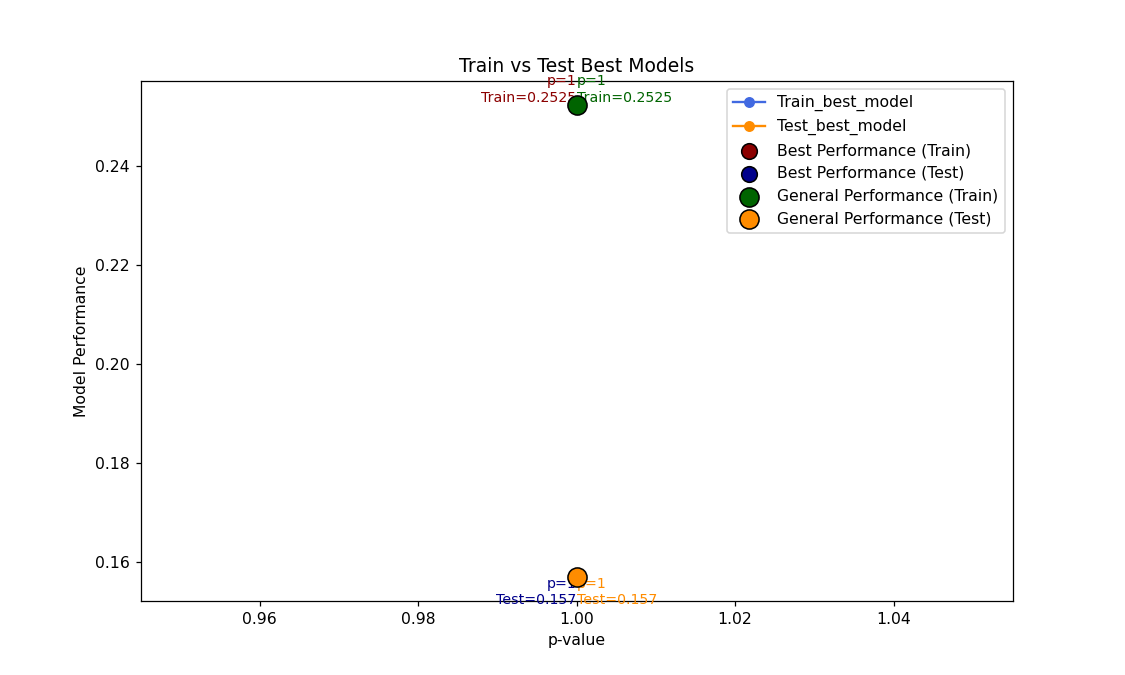

2. Reporting Generalized Performance:

|                  |            0 |
|:-----------------|-------------:|
| clump_p1         |    1         |
| clump_r2         |    0.1       |
| clump_kb         |  200         |
| p_window_size    |  200         |
| p_slide_size     |   50         |
| p_LD_threshold   |    0.25      |
| numberofpca      |    6         |
| tempalpha        |    0.1       |
| l1weight         |    0.1       |
| Train_pure_prs   | -408.191     |
| Train_null_model |    0.233856  |
| Train_best_model |    0.252479  |
| Test_pure_prs    | -425.092     |
| Test_null_model  |    0.137656  |
| Test_best_model  |    0.156992  |
| pvalue           |    1         |
| Difference       |    0.0954873 |
| Sum              |    0.409471  |
3. Reporting the correlation of hyperparameters and the performance of 'Train_null_model', 'Train_pure_prs', 'Train_best_model', 'Test_pure_prs', 'Test_null_model', and 'Test_best_model':

3. For string hyperparameters, we used one-hot encod

<IPython.core.display.Javascript object>


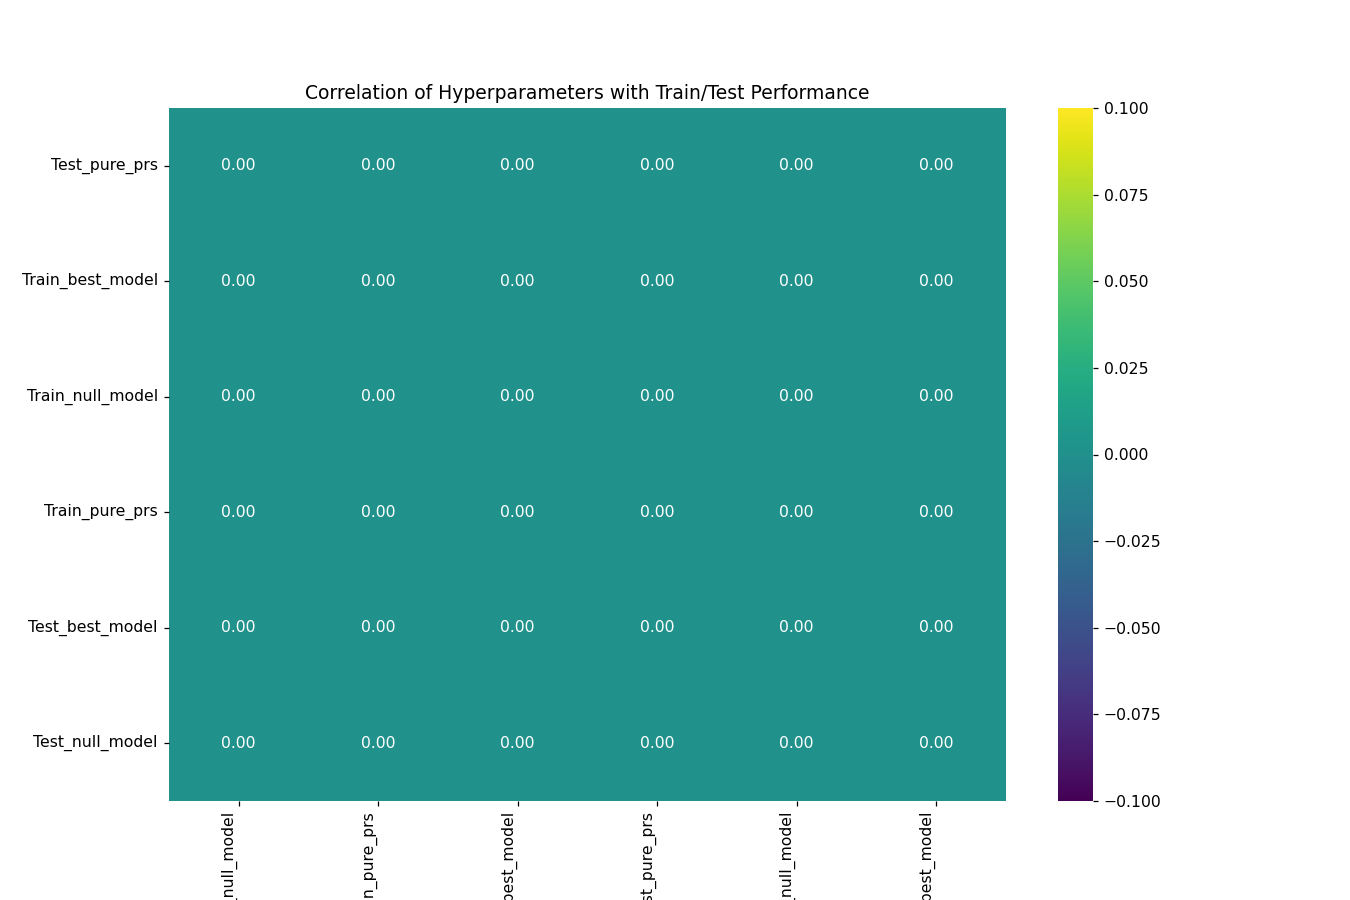

<IPython.core.display.Javascript object>


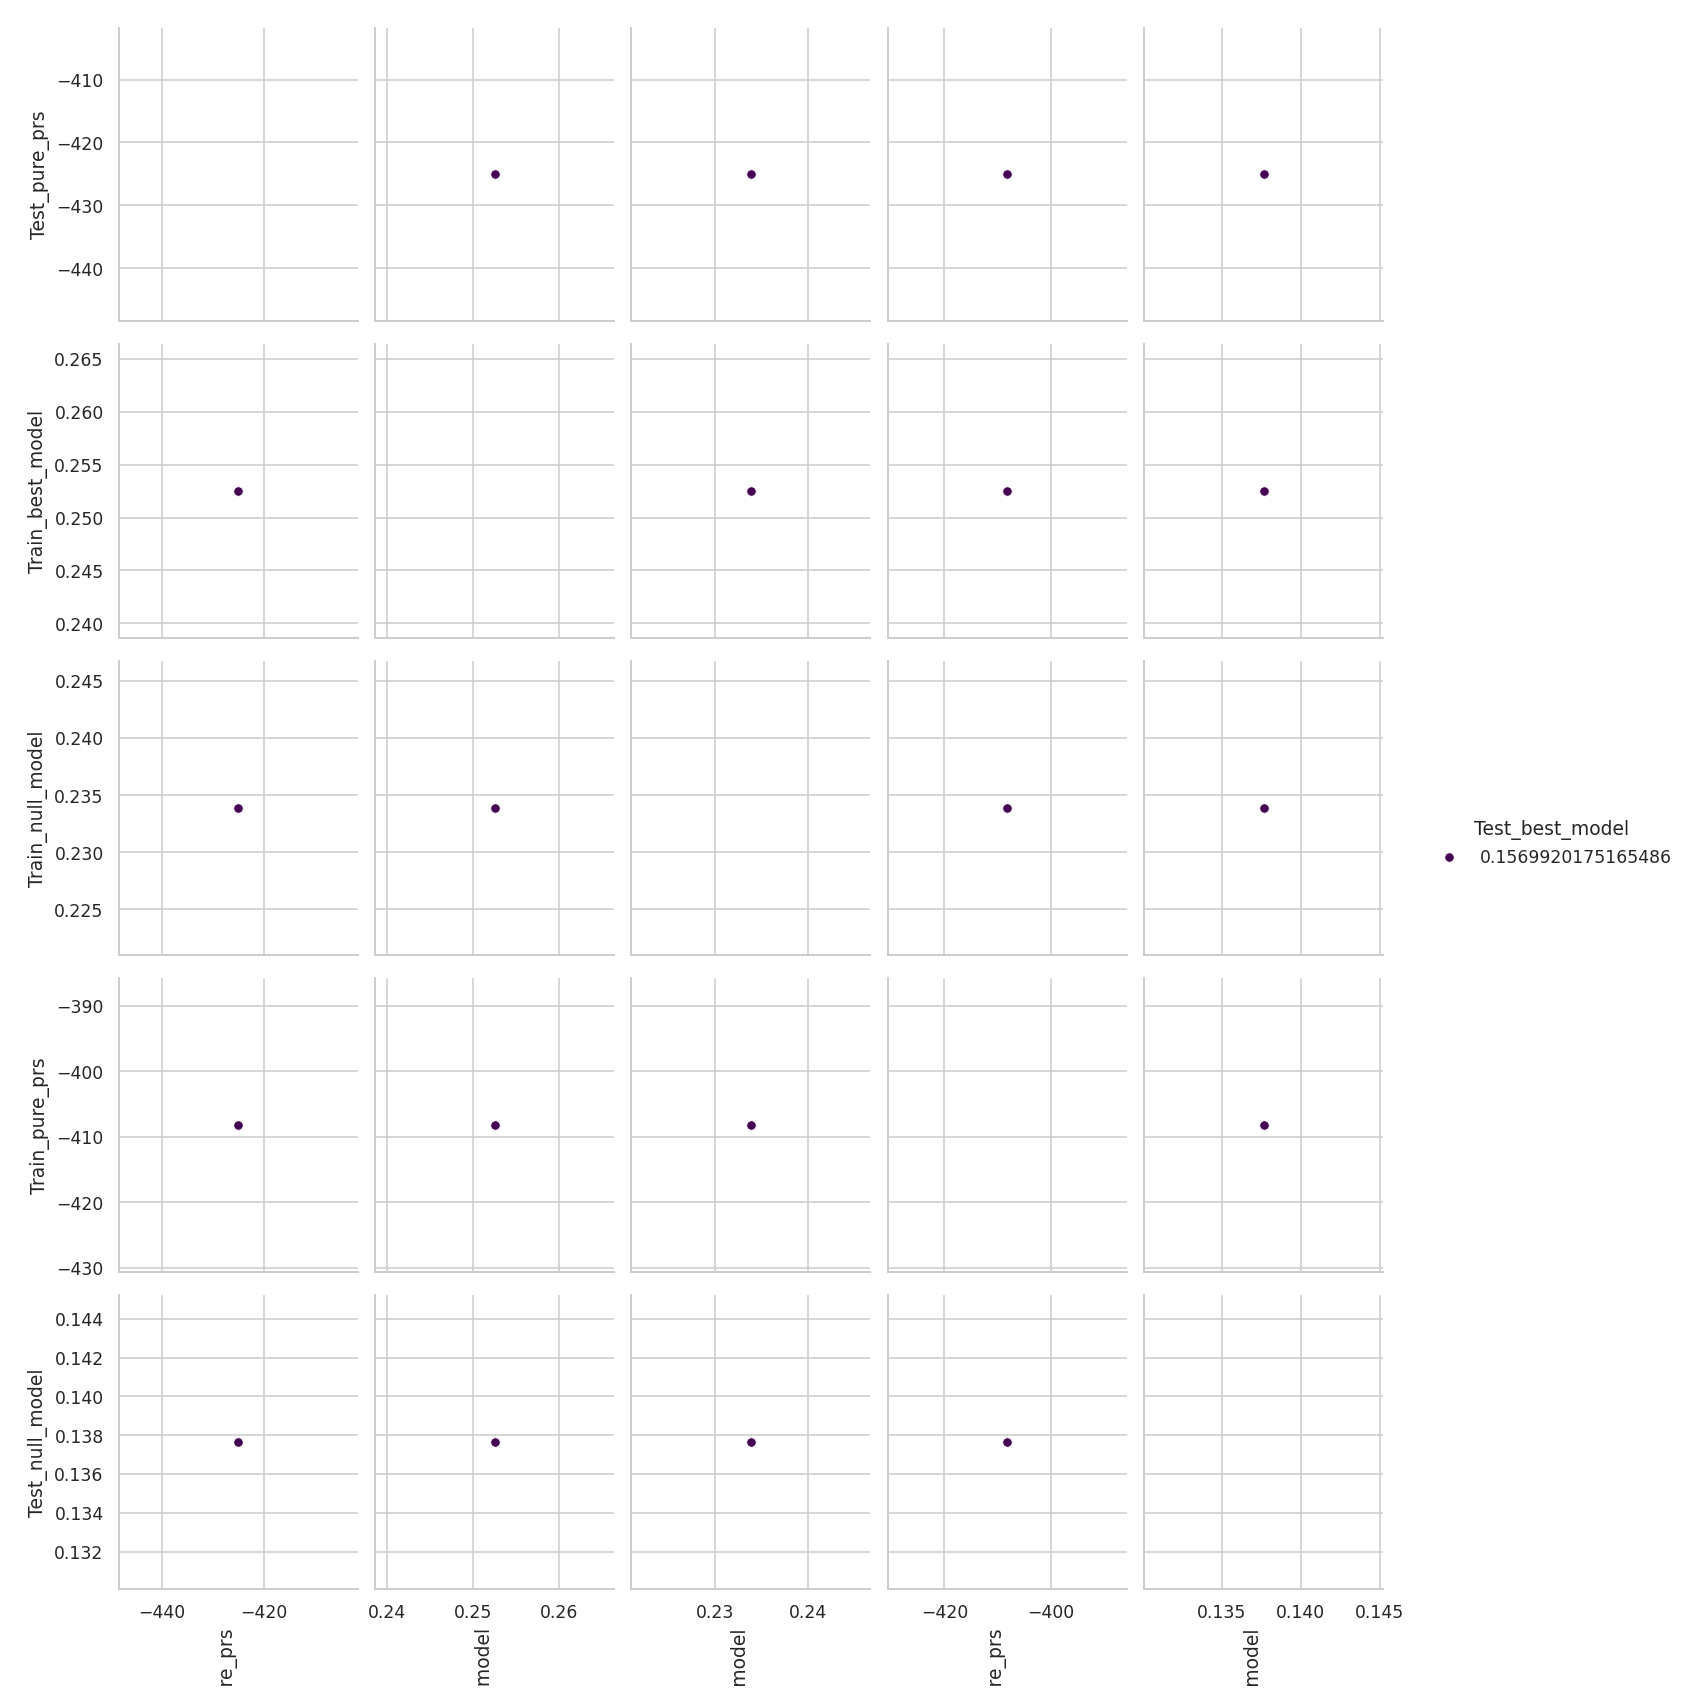

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

divided_result['pvalue'] = 1

df = divided_result.sort_values(by='Train_best_model', ascending=False)
print("1. Reporting Based on Best Training Performance:\n")
print(df.iloc[0].to_markdown())


 
df = divided_result.copy()

# Plot Train and Test best models against p-values
plt.figure(figsize=(10, 6))
plt.plot(df['pvalue'], df['Train_best_model'], label='Train_best_model', marker='o', color='royalblue')
plt.plot(df['pvalue'], df['Test_best_model'], label='Test_best_model', marker='o', color='darkorange')

# Highlight the p-value where both train and test are high
best_index = df[['Train_best_model']].sum(axis=1).idxmax()
best_pvalue = df.loc[best_index, 'pvalue']
best_train = df.loc[best_index, 'Train_best_model']
best_test = df.loc[best_index, 'Test_best_model']

# Use dark colors for the circles
plt.scatter(best_pvalue, best_train, color='darkred', s=100, label=f'Best Performance (Train)', edgecolor='black', zorder=5)
plt.scatter(best_pvalue, best_test, color='darkblue', s=100, label=f'Best Performance (Test)', edgecolor='black', zorder=5)

# Annotate the best performance with p-value, train, and test values
plt.text(best_pvalue, best_train, f'p={best_pvalue:.4g}\nTrain={best_train:.4g}', ha='right', va='bottom', fontsize=9, color='darkred')
plt.text(best_pvalue, best_test, f'p={best_pvalue:.4g}\nTest={best_test:.4g}', ha='right', va='top', fontsize=9, color='darkblue')

# Calculate Difference and Sum
df['Difference'] = abs(df['Train_best_model'] - df['Test_best_model'])
df['Sum'] = df['Train_best_model'] + df['Test_best_model']

# Sort the DataFrame
sorted_df = df.sort_values(by=['Sum', 'Difference'], ascending=[False, True])
#sorted_df = df.sort_values(by=[ 'Difference','Sum'], ascending=[  True,False])

# Highlight the general performance
general_index = sorted_df.index[0]
general_pvalue = sorted_df.loc[general_index, 'pvalue']
general_train = sorted_df.loc[general_index, 'Train_best_model']
general_test = sorted_df.loc[general_index, 'Test_best_model']

plt.scatter(general_pvalue, general_train, color='darkgreen', s=150, label='General Performance (Train)', edgecolor='black', zorder=6)
plt.scatter(general_pvalue, general_test, color='darkorange', s=150, label='General Performance (Test)', edgecolor='black', zorder=6)

# Annotate the general performance with p-value, train, and test values
plt.text(general_pvalue, general_train, f'p={general_pvalue:.4g}\nTrain={general_train:.4g}', ha='left', va='bottom', fontsize=9, color='darkgreen')
plt.text(general_pvalue, general_test, f'p={general_pvalue:.4g}\nTest={general_test:.4g}', ha='left', va='top', fontsize=9, color='darkorange')

# Add labels and legend
plt.xlabel('p-value')
plt.ylabel('Model Performance')
plt.title('Train vs Test Best Models')
plt.legend()
plt.show()
 




print("2. Reporting Generalized Performance:\n")
df = divided_result.copy()
df['Difference'] = abs(df['Train_best_model'] - df['Test_best_model'])
df['Sum'] = df['Train_best_model'] + df['Test_best_model']
sorted_df = df.sort_values(by=['Sum', 'Difference'], ascending=[False, True])
print(sorted_df.iloc[0].to_markdown())


print("3. Reporting the correlation of hyperparameters and the performance of 'Train_null_model', 'Train_pure_prs', 'Train_best_model', 'Test_pure_prs', 'Test_null_model', and 'Test_best_model':\n")

print("3. For string hyperparameters, we used one-hot encoding to find the correlation between string hyperparameters and 'Train_null_model', 'Train_pure_prs', 'Train_best_model', 'Test_pure_prs', 'Test_null_model', and 'Test_best_model'.")

print("3. We performed this analysis for those hyperparameters that have more than one unique value.")

correlation_columns = [
 'Train_null_model', 'Train_pure_prs', 'Train_best_model',
 'Test_pure_prs', 'Test_null_model', 'Test_best_model'
]

hyperparams = [col for col in divided_result.columns if len(divided_result[col].unique()) > 1]
hyperparams = list(set(hyperparams+correlation_columns))
 
# Separate numeric and string columns
numeric_hyperparams = [col for col in hyperparams if pd.api.types.is_numeric_dtype(divided_result[col])]
string_hyperparams = [col for col in hyperparams if pd.api.types.is_string_dtype(divided_result[col])]


# Encode string columns using one-hot encoding
divided_result_encoded = pd.get_dummies(divided_result, columns=string_hyperparams)

# Combine numeric hyperparams with the new one-hot encoded columns
encoded_columns = [col for col in divided_result_encoded.columns if col.startswith(tuple(string_hyperparams))]
hyperparams = numeric_hyperparams + encoded_columns
 

# Calculate correlations
correlations = divided_result_encoded[hyperparams].corr()
 
# Display correlation of hyperparameters with train/test performance columns
hyperparam_correlations = correlations.loc[hyperparams, correlation_columns]
 
hyperparam_correlations = hyperparam_correlations.fillna(0)

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(hyperparam_correlations, annot=True, cmap='viridis', fmt='.2f', cbar=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Rotate y-axis labels to horizontal
#ax.set_yticklabels(ax.get_yticklabels(), rotation=0, va='center')

plt.title('Correlation of Hyperparameters with Train/Test Performance')
plt.show() 

sns.set_theme(style="whitegrid")  # Choose your preferred style
pairplot = sns.pairplot(divided_result_encoded[hyperparams],hue = 'Test_best_model', palette='viridis')

# Adjust the figure size
pairplot.fig.set_size_inches(15, 15)  # You can adjust the size as needed

for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=90, ha='right')  # X-axis labels vertical
    #ax.set_ylabel(ax.get_ylabel(), rotation=0, va='bottom')  # Y-axis labels horizontal

# Show the plot
plt.show()


